# Práctica 2: Aprendizaje automático no supervisado

El objetivo de esta práctica es aplicar algunos algoritmos de aprendizaje automático no supervisado disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre un conjunto de datos e interpretar los resultados obtenidos.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

__Número de grupo: J__

__Nombres de los estudiantes: Pablo Navarro Cebrián y Adrián Gómez Lamuedra__

In [5]:
# acceso a google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `housing.csv` que se proporciona junto con la práctica.
Antes de nada, elimina las filas con valores nulos.



In [6]:
import pandas as pd
import numpy as np
from sklearn import datasets

df = pd.read_csv('housing.csv')
df = df.dropna().reset_index(drop=True).copy()
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20428    -121.09     39.48                25.0       1665.0           374.0   
20429    -121.21     39.49                18.0        697.0           150.0   
20430    -121.22     39.43                17.0       2254.0           485.0   
20431    -121.32     39.43                18.0       1860.0           409.0   
20432    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20428       845.0       330.0         1.5603             78100.0   
20429       356.0       114.0         2.5568             77100.0   
20430      1007.0       433.0         1.7000             92300.0   
20431       741.0       349.0         1.8672             84700.0   
20432      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20428          INLAND  
20429          INLAND  
20430          INLAND  
20431          INLAND  
20432          INLAND  

[20433 rows x 10 columns]

## 2) Análisis de los datos

### 2.1) Numéricos

Analiza razonadamente las distribuciones de cada una de las variables numéricas (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

In [7]:
df.describe().transpose()

count           mean            std         min  \
longitude           20433.0    -119.570689       2.003578   -124.3500   
latitude            20433.0      35.633221       2.136348     32.5400   
housing_median_age  20433.0      28.633094      12.591805      1.0000   
total_rooms         20433.0    2636.504233    2185.269567      2.0000   
total_bedrooms      20433.0     537.870553     421.385070      1.0000   
population          20433.0    1424.946949    1133.208490      3.0000   
households          20433.0     499.433465     382.299226      1.0000   
median_income       20433.0       3.871162       1.899291      0.4999   
median_house_value  20433.0  206864.413155  115435.667099  14999.0000   

                            25%          50%         75%          max  
longitude             -121.8000    -118.4900    -118.010    -114.3100  
latitude                33.9300      34.2600      37.720      41.9500  
housing_median_age      18.0000      29.0000      37.000      52.0000  
total_rooms           1450.0000    2127.0000    3143.000   39320.0000  
total_bedrooms         296.0000     435.0000     647.000    6445.0000  
population             787.0000    1166.0000    1722.000   35682.0000  
households             280.0000     409.0000     604.000    6082.0000  
median_income            2.5637       3.5365       4.744      15.0001  
median_house_value  119500.0000  179700.0000  264700.000  500001.0000

# Interpretación de los datos

- __Longitud y latitud__: Sus desviaciones típicas son alrededor de 2, que no es un valor muy alto, lo que nos dice que las casas se encuentran en la misma zona, que observando las coordenadas corresponde al estado de California en EEUU. El rango de valores de la longitud es (-124.35, -114.31) y de la latitud es (32.54, 41.95).

- __Edad media de la casa__: La desviación típica es 12 que es un valor relativamente alto respecto al rango de valores (1, 52) y la media 28.63, lo que nos dice que los valores están bastantes dispersos en este rango.

- __Total de habitaciones__: La desviación típica es 2185, un valor muy alto teniendo en cuenta que el 75% de los datos están debajo de 3143 habitaciones, algo común en un bloque de pisos estándar. Entendemos por tanto que hay muchos valores atípicos superiores a 3143, incluido el máximo, que es de 39320.

- __Total dormitorios__: Al igual que en el caso de las habitaciones, el 75% de los valores se encuentran por debajo de las 647 habitaciones, también lo común en un bloque de pisos. De nuevo observamos que han de haber muchos valores atípicos, especialmente a la derecha de 647, siendo el máximo 6445.

- __Población y número de hogares__: Ocurre lo mismo que en los dos casos anteriores. Esto nos sugiere que estas 4 características están relacionadas entre sí.

- __Sueldo medio__: La desviación típica no es muy alta, lo que indica que la mayoría de los valores están cerca de la media. Sin embargo podemos ver que el máximo se aleja mucho de estos valores (valores atípicos). En general observamos que el sueldo medio, que en este caso si es un dato representativo, es de 38700 dólares, muy por debajo del salario medio anual actual del estado de California, que es 65500, esto nos indica que probablemente nos encontramos en una época no reciente en el tiempo.

- __Valor medio de la casa__: la desviación típica es bastante alta, lo que nos dice que los valores están bastante dispersos. Los valores de los precios de las casas oscilan entre 15000 y 500000 dólares, con media de 206000, un nuevo indicador de que el instante de tiempo en el que se recogieron los datos no es en la actualidad, ya que el valor medio actual de vivienda en el estado de California es superior a los 780000$.


In [8]:
df.corr()

<ipython-input-8-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924616           -0.109357     0.045480   
latitude            -0.924616  1.000000            0.011899    -0.036667   
housing_median_age  -0.109357  0.011899            1.000000    -0.360628   
total_rooms          0.045480 -0.036667           -0.360628     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.100270 -0.108997           -0.295787     0.857281   
households           0.056513 -0.071774           -0.302768     0.918992   
median_income       -0.015550 -0.079626           -0.118278     0.197882   
median_house_value  -0.045398 -0.144638            0.106432     0.133294   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.100270    0.056513      -0.015550   
latitude                 -0.066983   -0.108997   -0.071774      -0.079626   
housing_median_age       -0.320451   -0.295787   -0.302768      -0.118278   
total_rooms               0.930380    0.857281    0.918992       0.197882   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907186       0.005087   
households                0.979728    0.907186    1.000000       0.013434   
median_income            -0.007723    0.005087    0.013434       1.000000   
median_house_value        0.049686   -0.025300    0.064894       0.688355   

                    median_house_value  
longitude                    -0.045398  
latitude                     -0.144638  
housing_median_age            0.106432  
total_rooms                   0.133294  
total_bedrooms                0.049686  
population                   -0.025300  
households                    0.064894  
median_income                 0.688355  
median_house_value            1.000000

# Correlación de las variables
En primer lugar observamos una correlación inversa bastante llamativa, teniendo en cuenta la naturaleza de las variables, entre la longitud y la latitud. Interpretando los datos geográficamente, observamos que la zona donde se ah realizado un estudio tiene forma de diagonal descendente. Veremos más clara esta relación en los diagramas de dispersión.

Por otro lado, como es de esperar, existe una gran correlación entre las habitaciones, los dormitorios, los hogares y los habitantes de cada bloque.

Por último, observamos una cierta correlación entre el salario de las familias y el valor de los hogares, algo que también tiene sentido, al comprar viviendas más caras las familias más pudientes.

array([[<Axes: xlabel='longitude', ylabel='longitude'>,
        <Axes: xlabel='latitude', ylabel='longitude'>,
        <Axes: xlabel='housing_median_age', ylabel='longitude'>,
        <Axes: xlabel='total_rooms', ylabel='longitude'>,
        <Axes: xlabel='total_bedrooms', ylabel='longitude'>,
        <Axes: xlabel='population', ylabel='longitude'>,
        <Axes: xlabel='households', ylabel='longitude'>,
        <Axes: xlabel='median_income', ylabel='longitude'>,
        <Axes: xlabel='median_house_value', ylabel='longitude'>],
       [<Axes: xlabel='longitude', ylabel='latitude'>,
        <Axes: xlabel='latitude', ylabel='latitude'>,
        <Axes: xlabel='housing_median_age', ylabel='latitude'>,
        <Axes: xlabel='total_rooms', ylabel='latitude'>,
        <Axes: xlabel='total_bedrooms', ylabel='latitude'>,
        <Axes: xlabel='population', ylabel='latitude'>,
        <Axes: xlabel='households', ylabel='latitude'>,
        <Axes: xlabel='median_income', ylabel='latitude'>,
    

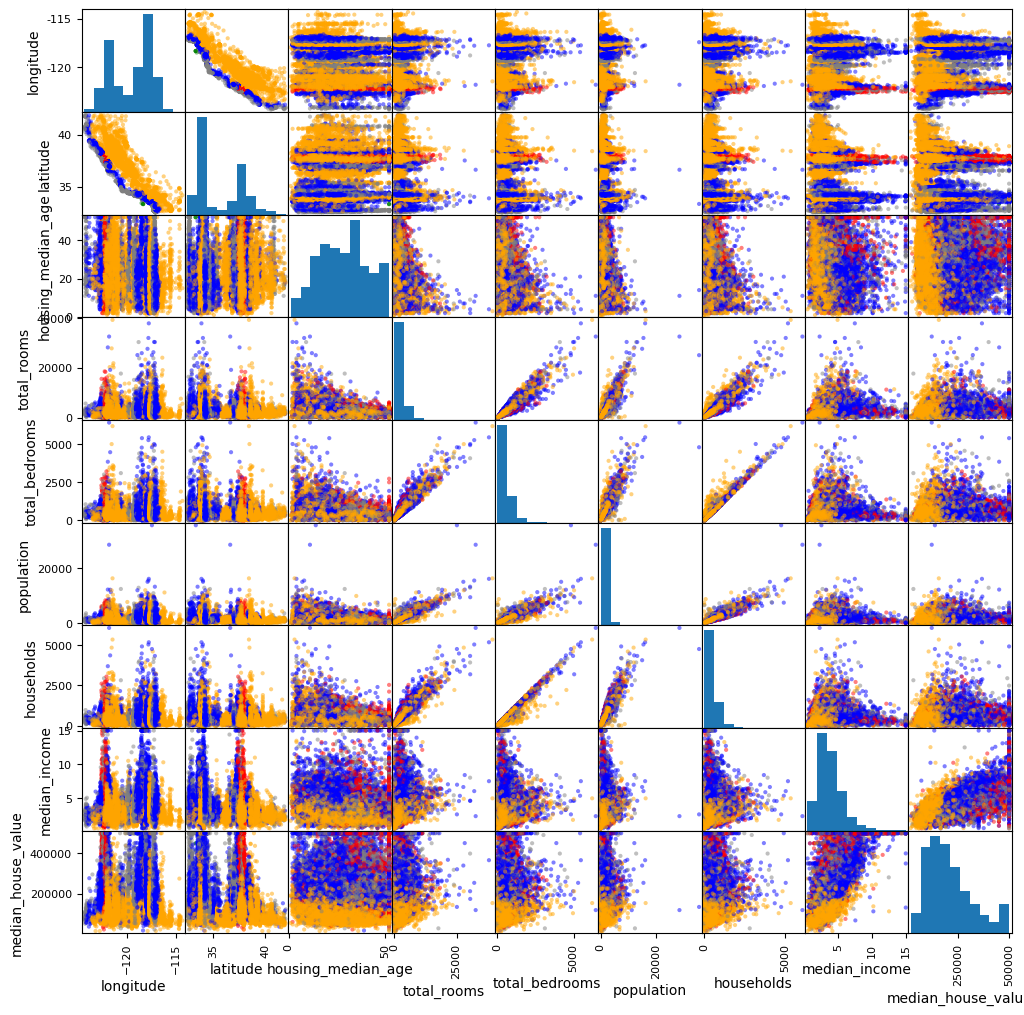

In [9]:
from pandas.plotting import scatter_matrix
%matplotlib inline

dic_colors = { 'NEAR BAY': 'red', '<1H OCEAN': 'blue', 'INLAND': 'orange', 'NEAR OCEAN': 'grey', 'ISLAND': 'green'}
colors = df['ocean_proximity'].map(dic_colors)

scatter_matrix(df, figsize = (12, 12), diagonal = 'hist', color=colors)

# Interpretación de los diagramas de dispersión
Hemos decidido utilizar colores para distinguir la proximidad de los bloques cerca del mar. Esto nos ha sido útil para interpretar los datos geográficos de los bloques, donde observamos que las viviendas en el sur y en el oeste están más próximas al océano Pacífico, disposición que concuerda con la realidad.

Por otro lado, es importante destacar que las viviendas que se compran en zonas próximas al océano (colores rojo, azul y gris) se corresponden tanto con familias en mejor situación económica como con las viviendas más caras, mientras que las alejadas de la costa (naranja) se corresponden con las casas de menor valor y con las familias más humildes. Esto tiene sentido ya que la cercanía a la costa suele incrementar el precio de las viviendas.

La correlación lineal entre las variables que hemos apuntado previamente es más que evidente en los diagramas, al igual que la no correlación de las restantes, por lo que no tenemos nada más que comentar al respecto.

Los histogramas, por otro lado, nos indican que la edad de las casas se distribuye de manera similar a una normal. El resto de variables presentan una distribución sesgada a la derecha, ya que la mayoría de valores se encuentran por debajo de la media y en la cola de la derecha observamos una gran cantidad de valores atípicos. Esto ocurre tanto en las habitaciones, dormitorios,... de los bloques, como en los ingresos familiares y el valor de las casas.


### 2.2) Categóricos

Analiza razonadamente las distribuciones de los valores de las variables categóricas incluyendo un diagrama de frecuencias y comentando lo más destacable.

In [10]:
df.describe(include=['object']).transpose()

count unique        top  freq
ocean_proximity  20433      5  <1H OCEAN  9034

Solo encontramos una variable categórica en el fichero, la que asocia cada bloque con su lejanía al océano.

Observamos que la mayoría de viviendas están a menos de una hora de la costa pero no próximas al mar. Esto tiene sentido ya que California es un estado costero pero a la vez muy grande.

<Axes: >

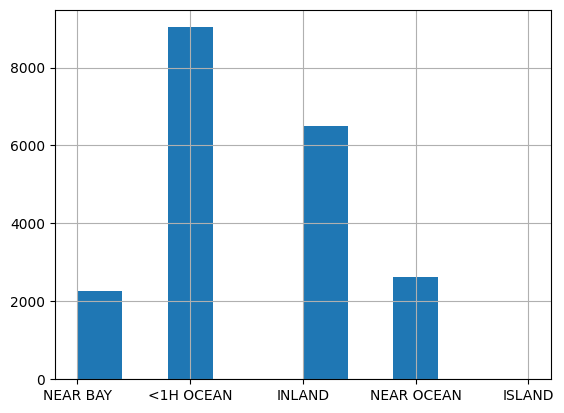

In [11]:
df['ocean_proximity'].hist()


El histograma nos da información numérica adicional, más concisa que los diagramas de dispersión, sobre como están distribuidos los bloques de viviendas respecto a su cercanía al mar.

In [12]:
df.groupby('ocean_proximity')['median_income', 'median_house_value', ].describe().transpose()

<ipython-input-12-4affd7844090>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('ocean_proximity')['median_income', 'median_house_value', ].describe().transpose()


ocean_proximity               <1H OCEAN         INLAND         ISLAND  \
median_income      count    9034.000000    6496.000000       5.000000   
                   mean        4.231101       3.210359       2.744420   
                   std         1.998300       1.437115       0.444180   
                   min         0.499900       0.499900       2.157900   
                   25%         2.865100       2.189950       2.604200   
                   50%         3.879000       2.989800       2.736100   
                   75%         5.181175       3.968800       2.833300   
                   max        15.000100      15.000100       3.390600   
median_house_value count    9034.000000    6496.000000       5.000000   
                   mean   240267.990812  124896.863147  380440.000000   
                   std    106198.324980   70057.955037   80559.561816   
                   min     17500.000000   14999.000000  287500.000000   
                   25%    164300.000000   77600.000000  300000.000000   
                   50%    215000.000000  108700.000000  414700.000000   
                   75%    289475.000000  149000.000000  450000.000000   
                   max    500001.000000  500001.000000  450000.000000   

ocean_proximity                NEAR BAY     NEAR OCEAN  
median_income      count    2270.000000    2628.000000  
                   mean        4.175647       4.006374  
                   std         2.021120       2.016157  
                   min         0.499900       0.536000  
                   25%         2.835750       2.623950  
                   50%         3.818650       3.648300  
                   75%         5.059200       4.838775  
                   max        15.000100      15.000100  
median_house_value count    2270.000000    2628.000000  
                   mean   259279.292070  249042.355023  
                   std    122853.742095  122548.010889  
                   min     22500.000000   22500.000000  
                   25%    162500.000000  150000.000000  
                   50%    233800.000000  228750.000000  
                   75%    346000.000000  322525.000000  
                   max    500001.000000  500001.000000

Nos parece interesante comparar en mayor detalle como se relacionan los precios de las viviendas y las situaciones familiares con la proximidad al mar. Lo primero que destancamos es que únicamente hay 5 bloques de viviendas situadas en islas, una situación totalmente excepcional, teniendo estas casas un valor medio de 380000 $, mucho más alto que la media total, que es 206000, y sin embargo un salario medio de 27000, menor que la media. Nuestra deducción es que se tratan de pequeños núcleos de viviendas, donde una de ellas es la de una familia pudiente y las demás son viviendas donde habitan empleados.

Observamos que los valores de las casas en zonas cercanas al océano o a menos de una hora del mar tienen una media similar, de unos 250000 $, y las familias que residen en ellas tienen un salario de unos 43000 dólares. También valores más altos que la media general.

Las viviendas a más de una hora de la costa tienen un valor medio de 125000 $, mucho menor que la media total. El salario medio de los bloques es de 32100 dólares, también menor que la media.

## 3) Preprocesar los datos

Para realizar el clustering puedes decidir quedarte con un subconjunto de las variables. Justifica la respuesta de tu decisión.

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

In [13]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
o_h_encoder = OneHotEncoder()

# Covertimos la variable categorica en representaciones binarias
encoded_df = o_h_encoder.fit_transform(df[['ocean_proximity']])
encoded_df = pd.DataFrame(encoded_df.toarray(), columns=o_h_encoder.get_feature_names_out(['ocean_proximity']))

# Eliminamos las variables que no necesitamos, incluyendo la categorica en forma no binaria
df_dropped = df.drop(['ocean_proximity', 'total_bedrooms', 'households'], axis=1).copy() # Eliminar las variables del dataset

total_df = df_dropped.join(encoded_df) # Unimos los dos data frames
total_df

longitude  latitude  housing_median_age  total_rooms  population  \
0        -122.23     37.88                41.0        880.0       322.0   
1        -122.22     37.86                21.0       7099.0      2401.0   
2        -122.24     37.85                52.0       1467.0       496.0   
3        -122.25     37.85                52.0       1274.0       558.0   
4        -122.25     37.85                52.0       1627.0       565.0   
...          ...       ...                 ...          ...         ...   
20428    -121.09     39.48                25.0       1665.0       845.0   
20429    -121.21     39.49                18.0        697.0       356.0   
20430    -121.22     39.43                17.0       2254.0      1007.0   
20431    -121.32     39.43                18.0       1860.0       741.0   
20432    -121.24     39.37                16.0       2785.0      1387.0   

       median_income  median_house_value  ocean_proximity_<1H OCEAN  \
0             8.3252            452600.0                        0.0   
1             8.3014            358500.0                        0.0   
2             7.2574            352100.0                        0.0   
3             5.6431            341300.0                        0.0   
4             3.8462            342200.0                        0.0   
...              ...                 ...                        ...   
20428         1.5603             78100.0                        0.0   
20429         2.5568             77100.0                        0.0   
20430         1.7000             92300.0                        0.0   
20431         1.8672             84700.0                        0.0   
20432         2.3886             89400.0                        0.0   

       ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                         0.0                     0.0   
1                         0.0                     0.0   
2                         0.0                     0.0   
3                         0.0                     0.0   
4                         0.0                     0.0   
...                       ...                     ...   
20428                     1.0                     0.0   
20429                     1.0                     0.0   
20430                     1.0                     0.0   
20431                     1.0                     0.0   
20432                     1.0                     0.0   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                           1.0                         0.0  
1                           1.0                         0.0  
2                           1.0                         0.0  
3                           1.0                         0.0  
4                           1.0                         0.0  
...                         ...                         ...  
20428                       0.0                         0.0  
20429                       0.0                         0.0  
20430                       0.0                         0.0  
20431                       0.0                         0.0  
20432                       0.0                         0.0  

[20433 rows x 12 columns]

Para preprocesar los datos se deben eliminar variables redundantes, es decir, altamente correlacionadas. En nuestro caso, el número total de habitaciones, el total de dormitorios, la población y los hogares presentan dos a dos un coeficiente de Pearson superior a 0.85. Todas ellas nos dan una idea intuitiva de la cantidad de viviendas en un mismo bloque. Concluimos que eliminar dos de ellas no nos haría perder mucha información, quedándonos únicamente con el total de habitaciones y la población, que son las que menos correlación tienen entre sí.

Por otro lado, la latitud está altamente correlacionada con la longitud de manera inversa, pero no consideramos oportuno eliminar una de estas dos variables dada su naturaleza, ya que seguramente al ampliar el tamaño de los datos que procesar estas variables no estarán tan correlacionadas.

En el caso de la variable categórica, hemos decidido transformarla en representación binaria mediante One Hot Encoding.

In [14]:
min_max_scaler = MinMaxScaler()
binary_weight = 0.2 # Quitarle peso a la variable binaria para hacer los clusters

numerical_values = min_max_scaler.fit_transform(df_dropped) # Escalar los valores numéricos
binary_values = min_max_scaler.fit_transform(encoded_df) # Escalar los binarios (mas bien pasarlo a un vector numpy)

binary_values *= binary_weight # Cambiar el peso de la variable binaria

scaled_values = np.concatenate([numerical_values, binary_values], axis=1) # Unimos los valores

df_dropped = pd.DataFrame(scaled_values, columns=list(df_dropped.columns) + list(encoded_df.columns)) # Volver a transformar el array escalado en un data frame
df_dropped

longitude  latitude  housing_median_age  total_rooms  population  \
0       0.211155  0.567481            0.784314     0.022331    0.008941   
1       0.212151  0.565356            0.392157     0.180503    0.067210   
2       0.210159  0.564293            1.000000     0.037260    0.013818   
3       0.209163  0.564293            1.000000     0.032352    0.015555   
4       0.209163  0.564293            1.000000     0.041330    0.015752   
...          ...       ...                 ...          ...         ...   
20428   0.324701  0.737513            0.470588     0.042296    0.023599   
20429   0.312749  0.738576            0.333333     0.017676    0.009894   
20430   0.311753  0.732200            0.313725     0.057277    0.028140   
20431   0.301793  0.732200            0.333333     0.047256    0.020684   
20432   0.309761  0.725824            0.294118     0.070782    0.038790   

       median_income  median_house_value  ocean_proximity_<1H OCEAN  \
0           0.539668            0.902266                        0.0   
1           0.538027            0.708247                        0.0   
2           0.466028            0.695051                        0.0   
3           0.354699            0.672783                        0.0   
4           0.230776            0.674638                        0.0   
...              ...                 ...                        ...   
20428       0.073130            0.130105                        0.0   
20429       0.141853            0.128043                        0.0   
20430       0.082764            0.159383                        0.0   
20431       0.094295            0.143713                        0.0   
20432       0.130253            0.153403                        0.0   

       ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                         0.0                     0.0   
1                         0.0                     0.0   
2                         0.0                     0.0   
3                         0.0                     0.0   
4                         0.0                     0.0   
...                       ...                     ...   
20428                     0.2                     0.0   
20429                     0.2                     0.0   
20430                     0.2                     0.0   
20431                     0.2                     0.0   
20432                     0.2                     0.0   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                           0.2                         0.0  
1                           0.2                         0.0  
2                           0.2                         0.0  
3                           0.2                         0.0  
4                           0.2                         0.0  
...                         ...                         ...  
20428                       0.0                         0.0  
20429                       0.0                         0.0  
20430                       0.0                         0.0  
20431                       0.0                         0.0  
20432                       0.0                         0.0  

[20433 rows x 12 columns]

Por último, basta considerar el escalado que realizaremos para poder agrupar los datos correctamente. Este tendrá que ser el mismo para todas las variables, ya que pequeñas modificaciones en las magnitudes tendrán un gran impacto al aplicar algoritmos de clustering.

Como casi ninguna variable sigue una distribución similar a la normal, hemos el escalado que aplicaremos a todas las variables será minMax.

Para que la variable categórica no tenga demasiada importancia al hacer los clusters, le hemos dado un peso de 0.2 a sus valores, en lugar de 1.


## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula el índice davies_boulding en función del número de clusters.

In [2]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.datasets import make_blobs
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [3]:
def plot_clusters(X, labels=None, centers=None):
    """ Función auxiliar para pintar los puntos de los clusters y, optativamente, sus centros.
    :param X: array de puntos de dos dimensiones (array de array de enteros)
    :param labels: cluster al que pertenece cada punto (array de enteros)
    :param centers: coordenadas de los centroides de los clusters (array de array de enteros)
    """

    colors = ['r','g','b','c','y','k','m', 'pink', 'orange', 'purple']
    fig = plt.figure(figsize=(8,8))

    # Pintamos los clusters. Los dos primeros parámetros de la función scatter son las coordenadas de los puntos,
    # el parámetro 'c' indica la clase asignada de cada punto, y 'cmap' se usa para colorear
    # las distintas clases
    plt.scatter(X[:,0], X[:,1], c=labels, cmap=ListedColormap(colors))

    # Pintar los centroides de los clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], marker="x", color='k', s=150, linewidths = 5, zorder=10)

    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


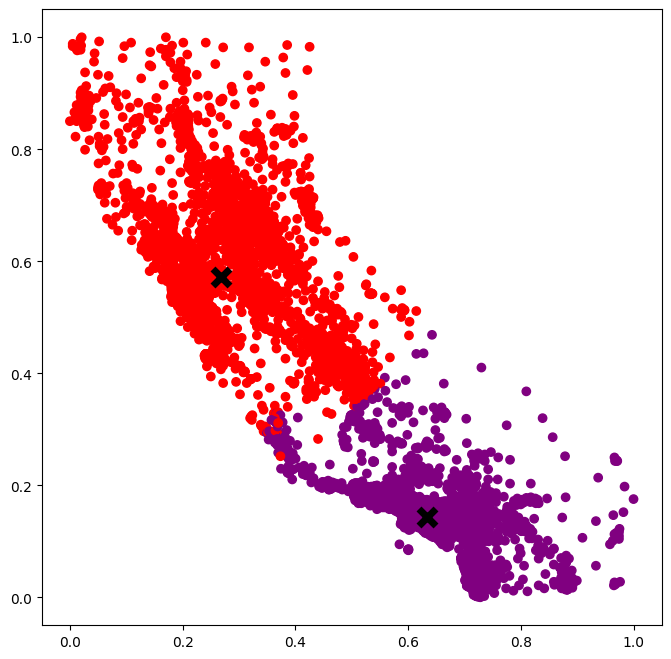

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


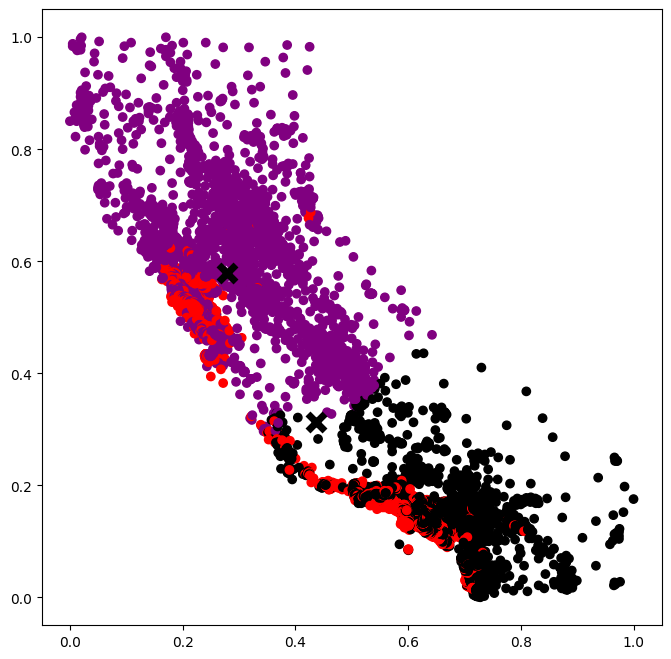

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


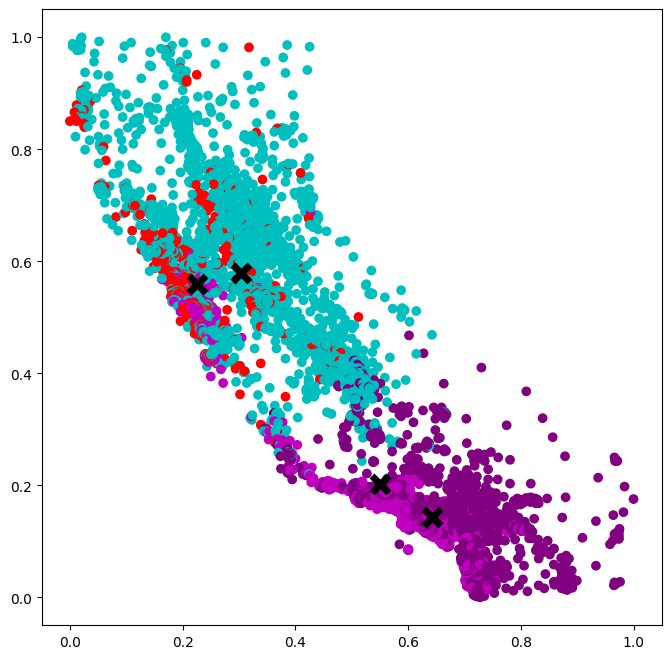

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


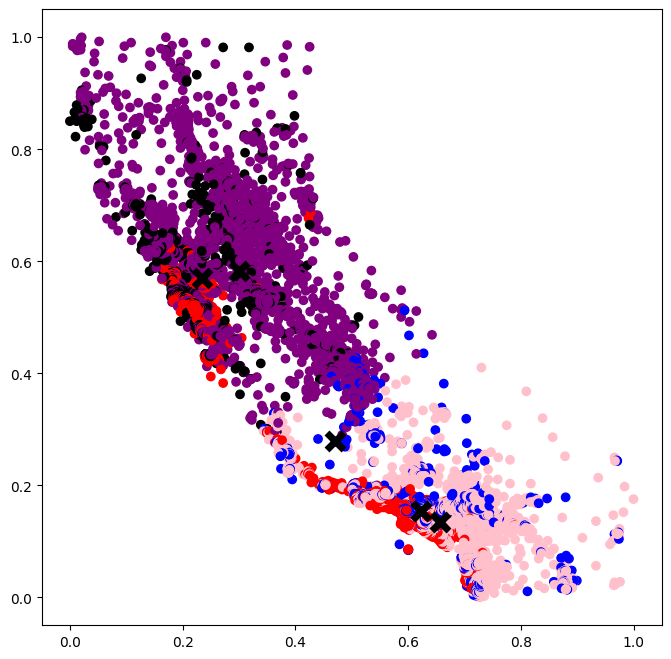

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


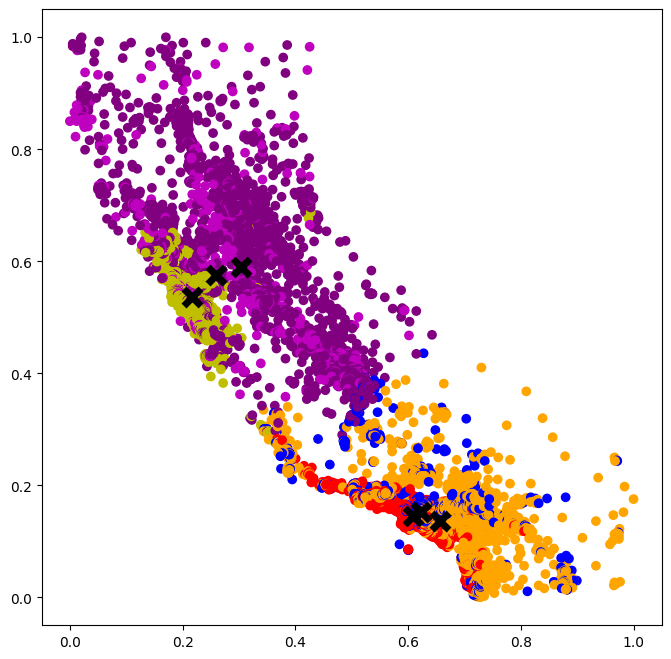

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


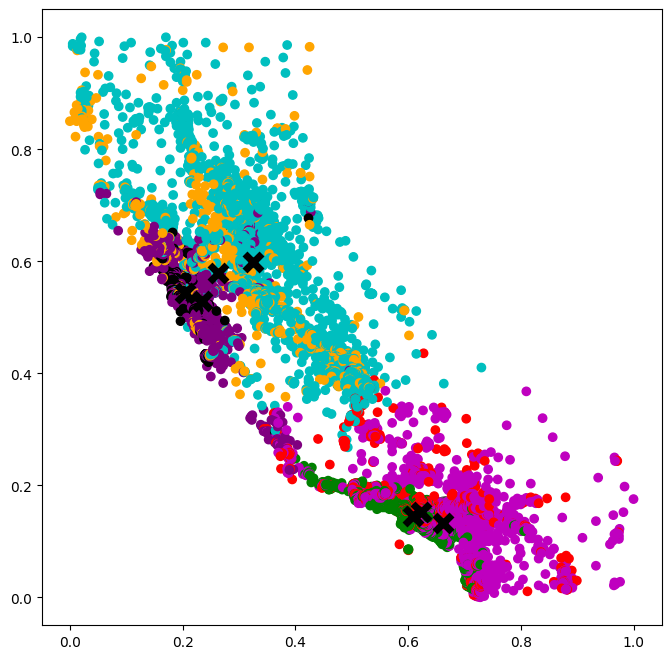

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


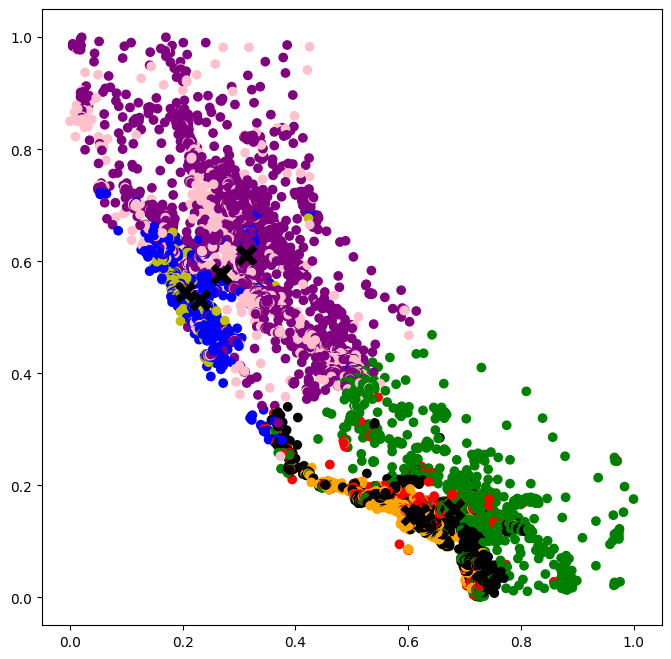

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


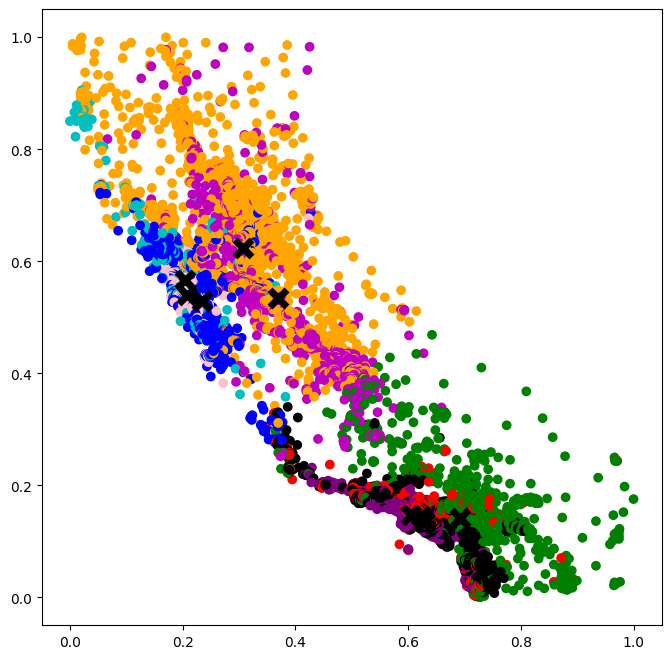

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


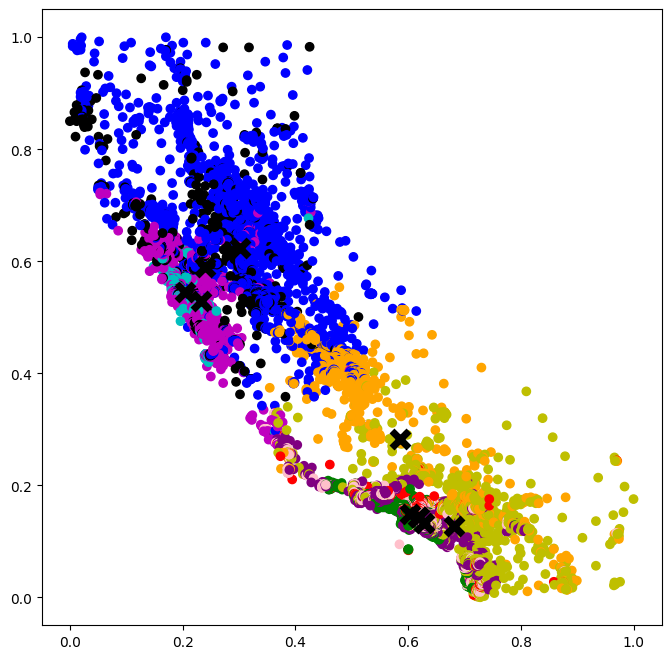

In [15]:
K_MAX = 11
davies_boulding = np.zeros(K_MAX-2)
for k in range(2, K_MAX): # Probamos a obtener distintos números de clusters, entre 2 y 10
    km = KMeans(init='random', n_clusters=k, random_state=333) # Aplicamos el algoritmo Kmeans
    km.fit(df_dropped.values)
    plot_clusters(df_dropped.values, km.labels_, km.cluster_centers_)

    davies_boulding[k-2] = davies_bouldin_score(df_dropped, km.labels_) # Obtenemos el ínidice de Davis_Boulding y lo guardamos en un vector

Text(0.5, 1.0, 'Valor de Davies Boulding para diferentes k')

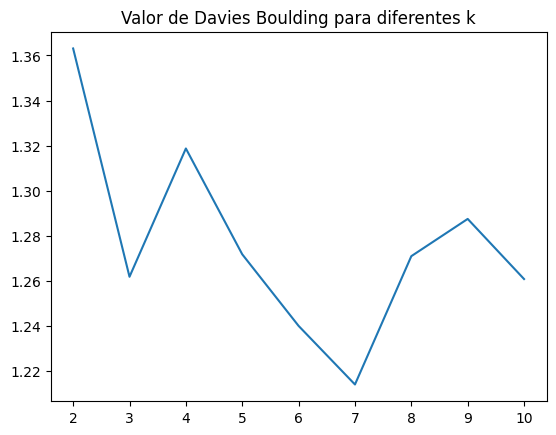

In [16]:
# Dibujar el diagrama de Davies-Boulding
plt.plot(range(2, K_MAX), davies_boulding)
plt.title('Valor de Davies Boulding para diferentes k')

Hemos ejecutado k-Means para clusters entre 2 y 10, y mostramos los clusters en funcion de su latitud y longitud. Además, mostramos una gráfica de los diferentes valores del índice de Davies Boulding. En ella podemos ver que con 7 clusters obtenemos el valor mínimo del índice, luego ese es el número de clusters óptimo.

## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior. Si te han salido más de 5 elige 5 de ellos que sean bastante diferentes entre sí.

Para hacerlo estudia sus descriptores estadísticos y dales un sentido dentro del contexto del problema.

Realiza una visualización teniendo en cuenta la latitud y la longitud e intenta darle una interpretación.

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar k-Means con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


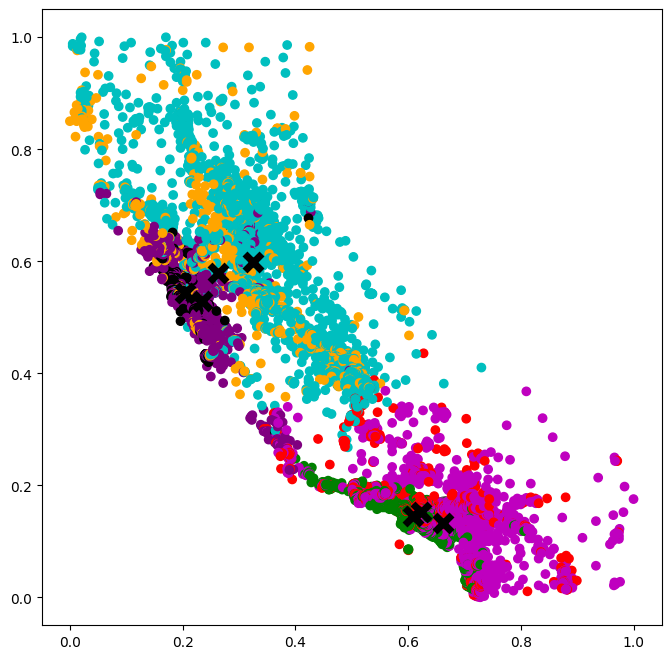

In [17]:
km = KMeans(init='random', n_clusters=7, random_state=333)
km.fit(df_dropped.values)
plot_clusters(df_dropped.values, km.labels_, km.cluster_centers_)

In [18]:
filtered = df.drop(['ocean_proximity', 'total_bedrooms', 'households'], axis=1).copy()
df_clusters = filtered.assign(cluster=pd.Series(data=km.labels_))
df_clusters

longitude  latitude  housing_median_age  total_rooms  population  \
0        -122.23     37.88                41.0        880.0       322.0   
1        -122.22     37.86                21.0       7099.0      2401.0   
2        -122.24     37.85                52.0       1467.0       496.0   
3        -122.25     37.85                52.0       1274.0       558.0   
4        -122.25     37.85                52.0       1627.0       565.0   
...          ...       ...                 ...          ...         ...   
20428    -121.09     39.48                25.0       1665.0       845.0   
20429    -121.21     39.49                18.0        697.0       356.0   
20430    -121.22     39.43                17.0       2254.0      1007.0   
20431    -121.32     39.43                18.0       1860.0       741.0   
20432    -121.24     39.37                16.0       2785.0      1387.0   

       median_income  median_house_value  cluster  
0             8.3252            452600.0        3  
1             8.3014            358500.0        6  
2             7.2574            352100.0        3  
3             5.6431            341300.0        3  
4             3.8462            342200.0        3  
...              ...                 ...      ...  
20428         1.5603             78100.0        2  
20429         2.5568             77100.0        2  
20430         1.7000             92300.0        2  
20431         1.8672             84700.0        2  
20432         2.3886             89400.0        2  

[20433 rows x 8 columns]

Ahora, hemos reescalado los datos y añadido una columna con el cluster correspondiente a cada entrada. Todo ello con el número de clusters óptimo (7).

In [19]:
df_clusters.groupby(["cluster"]).describe().transpose()

cluster                               0              1              2  \
longitude          count    5288.000000    2121.000000    3105.000000   
                   mean     -118.093618    -118.241287    -121.083945   
                   std         0.621026       0.528052       1.124182   
                   min      -120.890000    -120.670000    -124.300000   
                   25%      -118.310000    -118.430000    -121.800000   
                   50%      -118.170000    -118.340000    -121.250000   
                   75%      -117.930000    -117.960000    -120.180000   
                   max      -114.580000    -116.260000    -117.020000   
latitude           count    5288.000000    2121.000000    3105.000000   
                   mean       33.967744      33.899307      38.175031   
                   std         0.508319       0.374282       1.283608   
                   min        32.570000      32.630000      35.060000   
                   25%        33.880000      33.770000      37.280000   
                   50%        34.010000      34.010000      38.140000   
                   75%        34.120000      34.130000      38.930000   
                   max        36.640000      35.300000      41.950000   
housing_median_age count    5288.000000    2121.000000    3105.000000   
                   mean       37.084342      30.852900      18.096940   
                   std         6.557978      11.480215       6.601600   
                   min        24.000000       2.000000       1.000000   
                   25%        32.000000      23.000000      14.000000   
                   50%        36.000000      31.000000      18.000000   
                   75%        42.000000      39.000000      23.000000   
                   max        52.000000      52.000000      31.000000   
total_rooms        count    5288.000000    2121.000000    3105.000000   
                   mean     1868.164713    2925.770863    2707.338164   
                   std       976.294210    2095.250573    2231.225600   
                   min        11.000000      20.000000      19.000000   
                   25%      1237.000000    1721.000000    1504.000000   
                   50%      1722.500000    2464.000000    2232.000000   
                   75%      2343.250000    3527.000000    3257.000000   
                   max     17738.000000   30405.000000   39320.000000   
population         count    5288.000000    2121.000000    3105.000000   
                   mean     1304.097390    1230.403583    1395.752335   
                   std       736.318116     872.020659    1214.863504   
                   min         8.000000      15.000000       9.000000   
                   25%       821.000000     727.000000     746.000000   
                   50%      1159.000000    1027.000000    1150.000000   
                   75%      1615.000000    1489.000000    1703.000000   
                   max     12427.000000   12873.000000   28566.000000   
median_income      count    5288.000000    2121.000000    3105.000000   
                   mean        3.158133       6.167981       3.058017   
                   std         1.132868       2.529313       1.129689   
                   min         0.499900       0.499900       0.499900   
                   25%         2.260625       4.343800       2.225000   
                   50%         3.096250       5.863500       2.922200   
                   75%         3.959025       7.418500       3.750000   
                   max        10.226400      15.000100       8.360800   
median_house_value count    5288.000000    2121.000000    3105.000000   
                   mean   168711.232791  410262.005658  114733.847987   
                   std     59988.803728   74521.973113   42248.800505   
                   min     14999.000000  258000.000000   14999.000000   
                   25%    124275.000000  345800.000000   81900.000000   
                   50%    166200.000000  401000.000000  11

Por último, agrupamos por clusters y analizaremos sus diferentes valores estadíticos.

En primer lugar, la gran cantidad de variables con importancia da lugar a una explicación compleja para separar los clusters. Trataremos de simplificarla lo máximo posible mediante un razonamiento similar al de un árbol de decisión.

La primera separación que haremos de los clusters será la más visual, los clusters que en su mayoría agrupan casas del nor-oeste o del sur-este. Los del primer grupo son los clusters 2, 3, 5 y 6 (en nuestro caso cyan, negro, naranja y morado respectivamente), y los del segundo, 0, 1 y 4 (rojo, verde y magenta).

De las casas del nor-oeste destacamos el cluster 3, que agrupa casas con precios más caros (por encima de los 350000 USD de media), el cluster 6, que agrupa las casas de precio un poco menor (283000 USD de media) y los clusters 2 y 5, cuyas casas son más baratas (menos de 140000 USD de media). Las casas en el cluster 2 tienen menos edad media que las del cluster 5 (media de 18 años vs 45 años), siendo este el atributo que los separa.

En los clusters del sur-este, diferenciamos primero el cluster 1, que agrupa las casas más caras (media de 410000 USD), mientras que los clusters 0 y 4 no superan los 185000 USD de media. De nuevo los clusters 0 y 4 se distinguen ya que en el cluster 0 las casas tienen una media de 37 años, mientras que en el cluster 4 estas tienen una media de menos de 21 años.


cluster
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
2    Axes(0.125,0.11;0.775x0.77)
3    Axes(0.125,0.11;0.775x0.77)
4    Axes(0.125,0.11;0.775x0.77)
5    Axes(0.125,0.11;0.775x0.77)
6    Axes(0.125,0.11;0.775x0.77)
Name: longitude, dtype: object

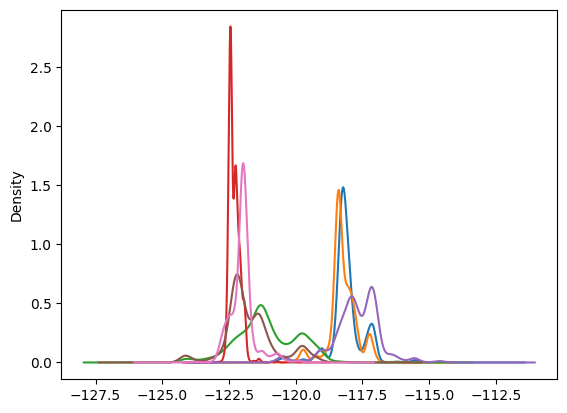

In [20]:
df_clusters.groupby(["cluster"])["longitude"].plot(kind="density")

cluster
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
2    Axes(0.125,0.11;0.775x0.77)
3    Axes(0.125,0.11;0.775x0.77)
4    Axes(0.125,0.11;0.775x0.77)
5    Axes(0.125,0.11;0.775x0.77)
6    Axes(0.125,0.11;0.775x0.77)
Name: latitude, dtype: object

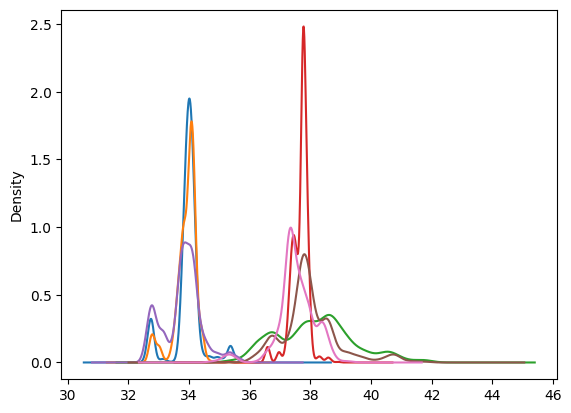

In [21]:
df_clusters.groupby(["cluster"])["latitude"].plot(kind="density")

Las distribuciones de las variables longitude y latitude nos ayudaron a visualizar la primera división que hicimos en clusters que agrupan casas del norte y clusters que agrupan casas del sur.

In [22]:
df_dropped_2 = df_dropped.drop(['housing_median_age'], axis=1).copy()
df_dropped_2

longitude  latitude  total_rooms  population  median_income  \
0       0.211155  0.567481     0.022331    0.008941       0.539668   
1       0.212151  0.565356     0.180503    0.067210       0.538027   
2       0.210159  0.564293     0.037260    0.013818       0.466028   
3       0.209163  0.564293     0.032352    0.015555       0.354699   
4       0.209163  0.564293     0.041330    0.015752       0.230776   
...          ...       ...          ...         ...            ...   
20428   0.324701  0.737513     0.042296    0.023599       0.073130   
20429   0.312749  0.738576     0.017676    0.009894       0.141853   
20430   0.311753  0.732200     0.057277    0.028140       0.082764   
20431   0.301793  0.732200     0.047256    0.020684       0.094295   
20432   0.309761  0.725824     0.070782    0.038790       0.130253   

       median_house_value  ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                0.902266                        0.0                     0.0   
1                0.708247                        0.0                     0.0   
2                0.695051                        0.0                     0.0   
3                0.672783                        0.0                     0.0   
4                0.674638                        0.0                     0.0   
...                   ...                        ...                     ...   
20428            0.130105                        0.0                     0.2   
20429            0.128043                        0.0                     0.2   
20430            0.159383                        0.0                     0.2   
20431            0.143713                        0.0                     0.2   
20432            0.153403                        0.0                     0.2   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                         0.0                       0.2   
1                         0.0                       0.2   
2                         0.0                       0.2   
3                         0.0                       0.2   
4                         0.0                       0.2   
...                       ...                       ...   
20428                     0.0                       0.0   
20429                     0.0                       0.0   
20430                     0.0                       0.0   
20431                     0.0                       0.0   
20432                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0  
...                           ...  
20428                         0.0  
20429                         0.0  
20430                         0.0  
20431                         0.0  
20432                         0.0  

[20433 rows x 11 columns]

Con el objetivo de simplificar un poco los clusters que nos hemos encontrado, haremos un análisis sin la variable housing_median_age, ya que nos parece que complica demasiado el ánalisis.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


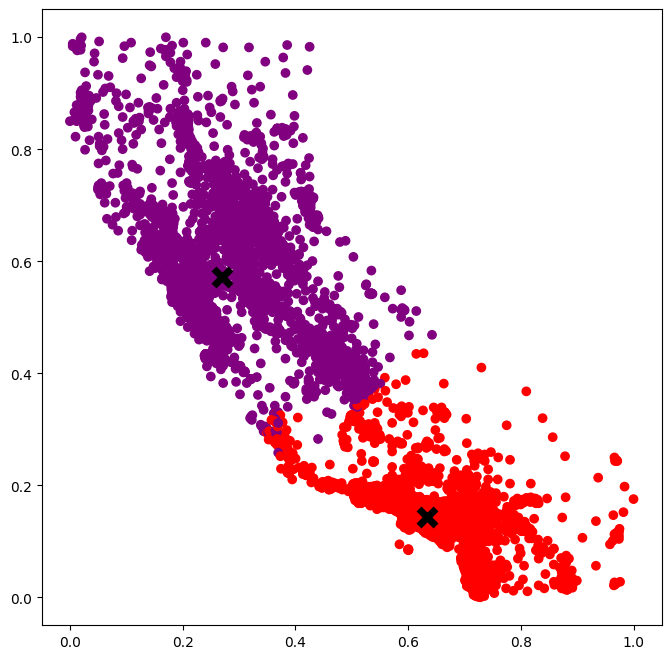

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


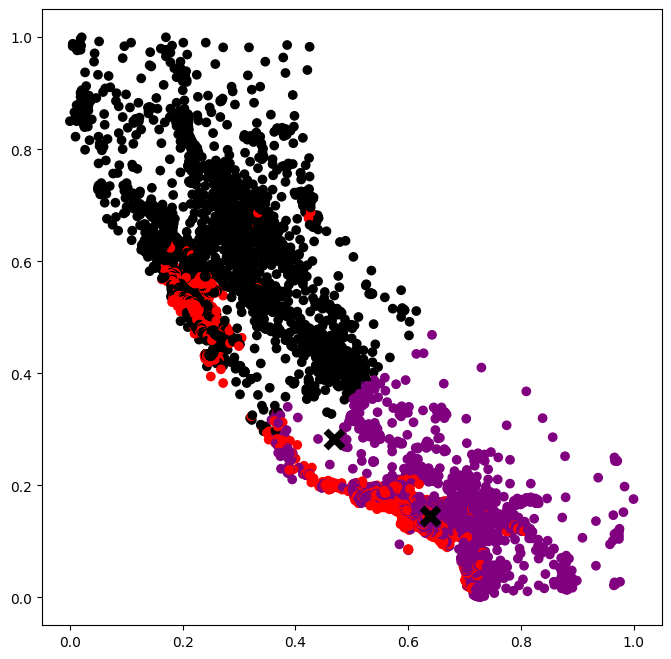

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


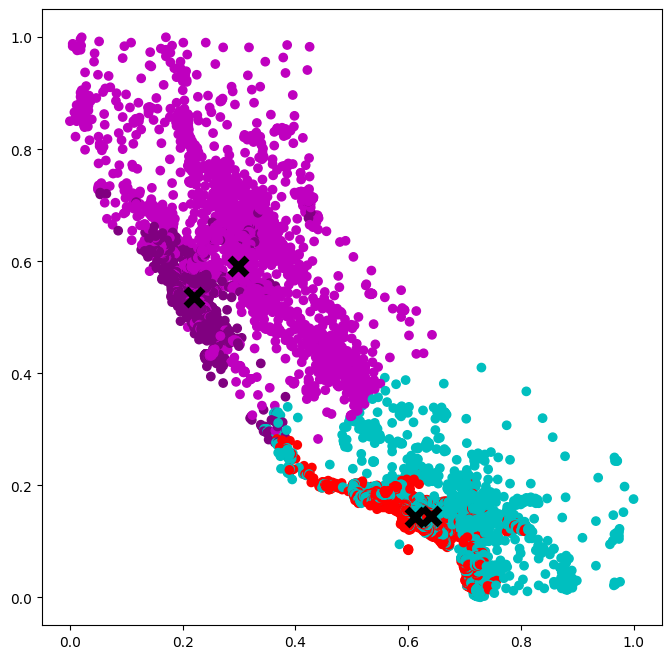

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


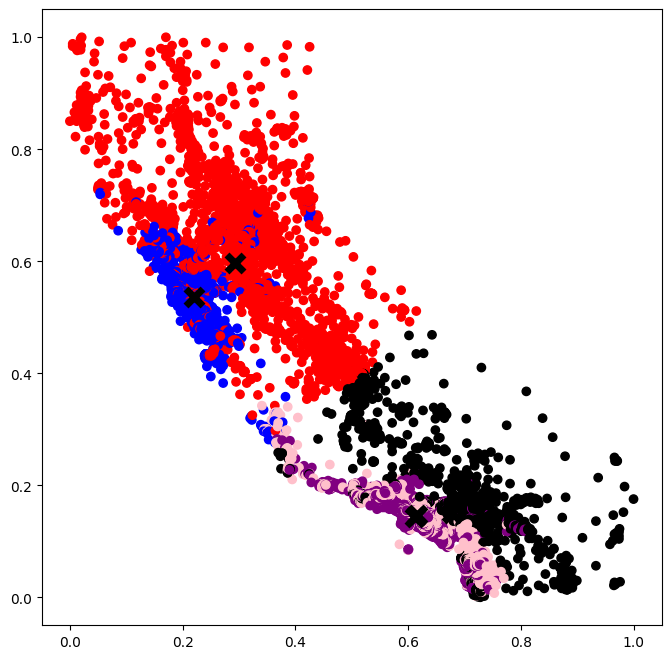

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


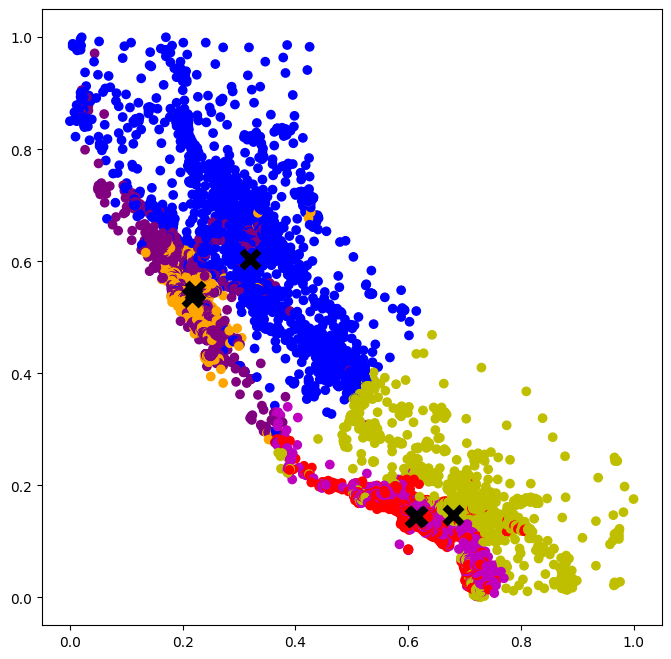

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


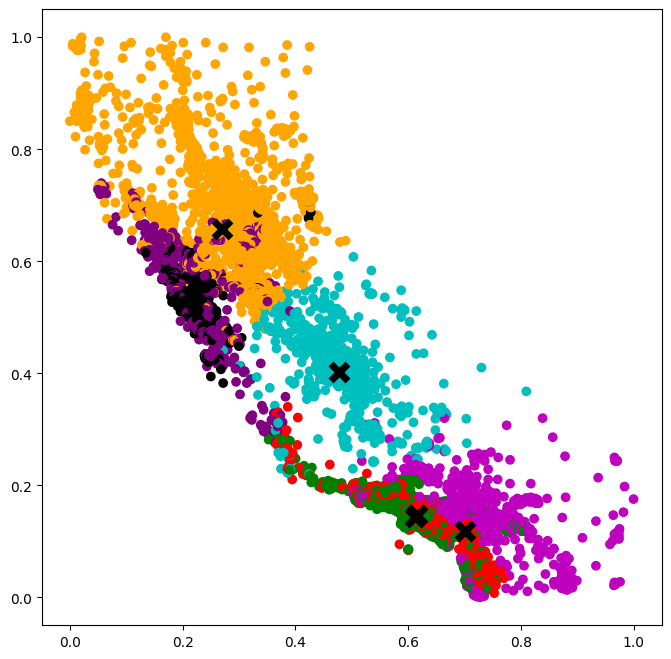

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


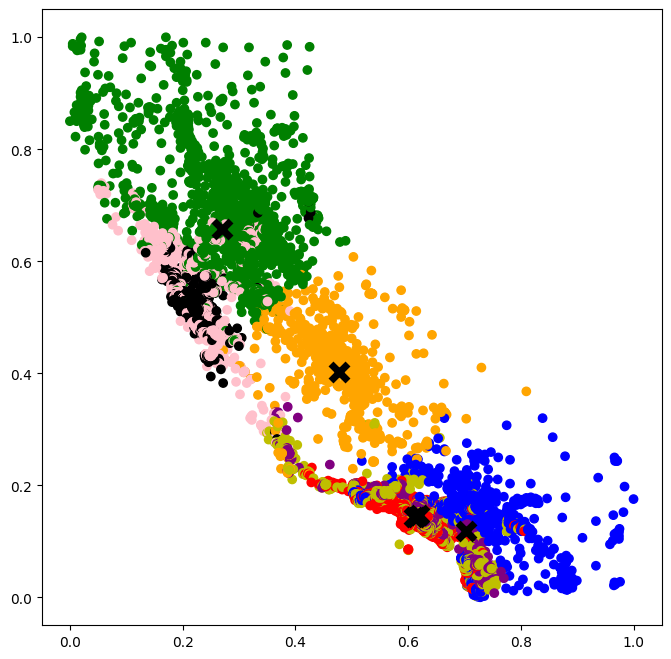

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


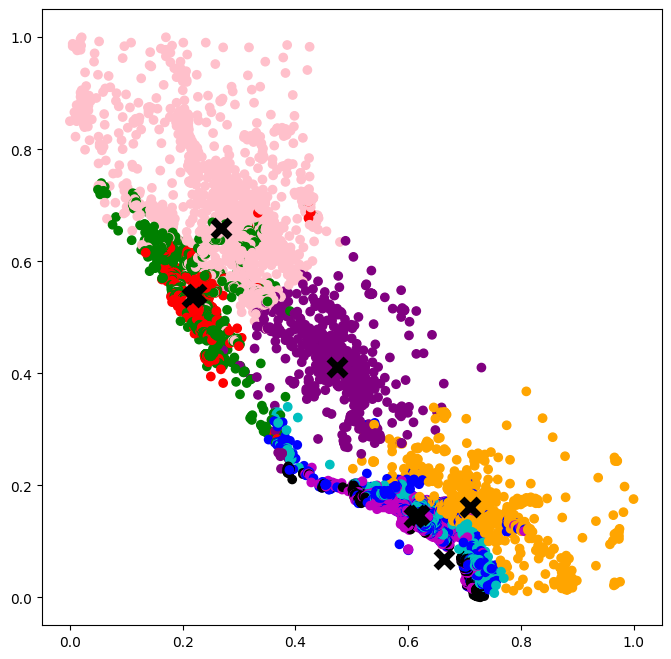

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


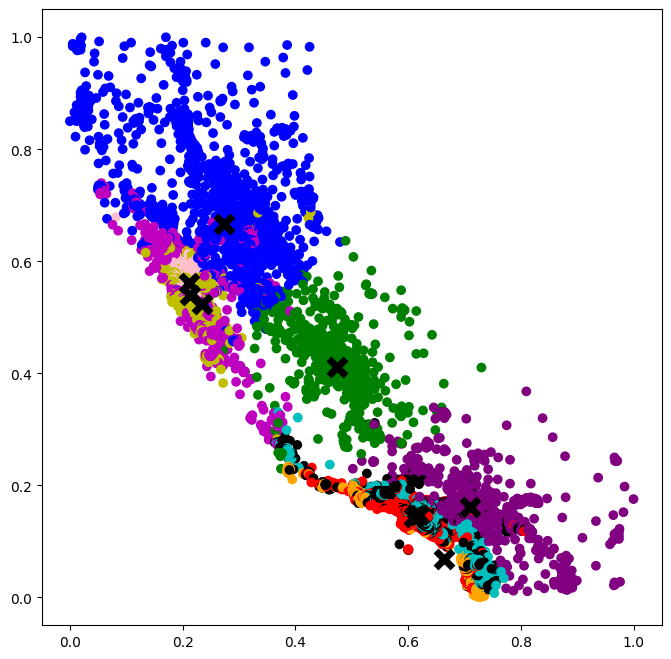

In [23]:
K_MAX = 11
davies_boulding_2 = np.zeros(K_MAX-2)
for k in range(2, K_MAX): # Probamos a obtener distintos números de clusters, entre 2 y 10
    km = KMeans(init='random', n_clusters=k, random_state=333) # Aplicamos el algoritmo Kmeans
    km.fit(df_dropped_2.values)
    plot_clusters(df_dropped_2.values, km.labels_, km.cluster_centers_)

    davies_boulding_2[k-2] = davies_bouldin_score(df_dropped_2, km.labels_) # Obtenemos el ínidice de Davis_Boulding y lo guardamos en un vector

Text(0.5, 1.0, 'Valor de Davies Boulding para diferentes k')

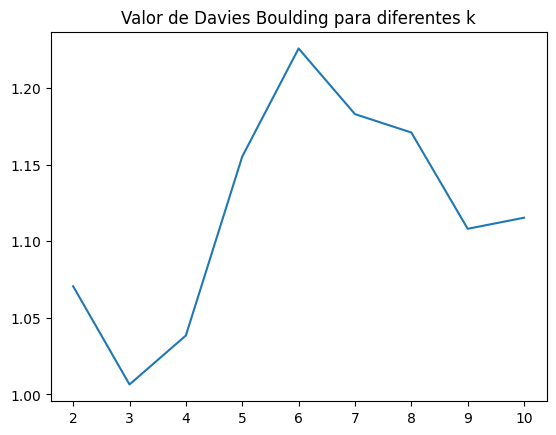

In [24]:
# Dibujar el diagrama de Davies-Boulding
plt.plot(range(2, K_MAX), davies_boulding_2)
plt.title('Valor de Davies Boulding para diferentes k')

Observamos que ahora el número óptimo de clusters según el índice de D-B es solamente 3.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


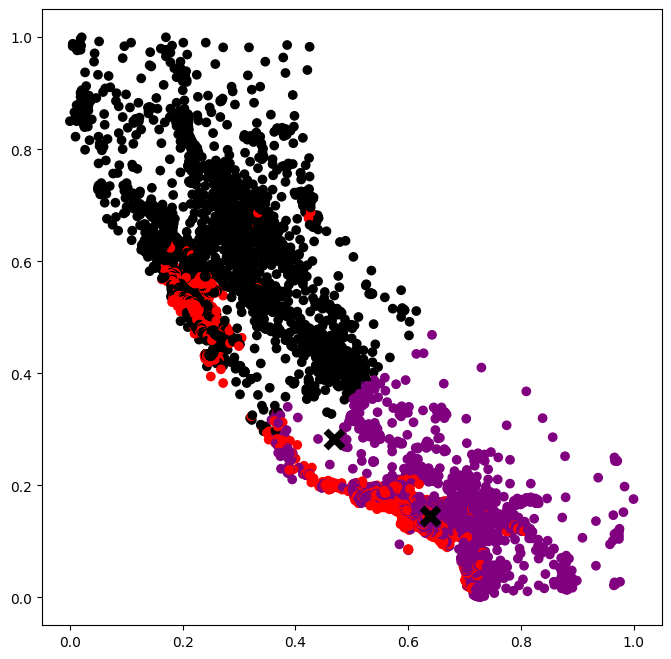

In [25]:
km = KMeans(init='random', n_clusters=3, random_state=333)
km.fit(df_dropped_2.values)
plot_clusters(df_dropped_2.values, km.labels_, km.cluster_centers_)

In [26]:
filtered = df.drop(['ocean_proximity', 'total_bedrooms', 'households', 'housing_median_age'], axis=1).copy()
df_clusters_2 = filtered.assign(cluster=pd.Series(data=km.labels_))
df_clusters_2

longitude  latitude  total_rooms  population  median_income  \
0        -122.23     37.88        880.0       322.0         8.3252   
1        -122.22     37.86       7099.0      2401.0         8.3014   
2        -122.24     37.85       1467.0       496.0         7.2574   
3        -122.25     37.85       1274.0       558.0         5.6431   
4        -122.25     37.85       1627.0       565.0         3.8462   
...          ...       ...          ...         ...            ...   
20428    -121.09     39.48       1665.0       845.0         1.5603   
20429    -121.21     39.49        697.0       356.0         2.5568   
20430    -121.22     39.43       2254.0      1007.0         1.7000   
20431    -121.32     39.43       1860.0       741.0         1.8672   
20432    -121.24     39.37       2785.0      1387.0         2.3886   

       median_house_value  cluster  
0                452600.0        0  
1                358500.0        0  
2                352100.0        0  
3                341300.0        1  
4                342200.0        1  
...                   ...      ...  
20428             78100.0        1  
20429             77100.0        1  
20430             92300.0        1  
20431             84700.0        1  
20432             89400.0        1  

[20433 rows x 7 columns]

In [27]:
df_clusters_2.groupby(["cluster"]).describe().transpose()

cluster                               0              1              2
longitude          count    3276.000000    7596.000000    9561.000000
                   mean     -119.643541    -121.598390    -117.934763
                   std         1.916428       0.992128       0.770817
                   min      -122.710000    -124.350000    -120.760000
                   25%      -122.020000    -122.260000    -118.290000
                   50%      -118.470000    -121.850000    -118.050000
                   75%      -118.180000    -121.180000    -117.360000
                   max      -116.260000    -118.180000    -114.310000
latitude           count    3276.000000    7596.000000    9561.000000
                   mean       35.196215      37.997878      33.904291
                   std         1.760839       1.019183       0.607538
                   min        32.630000      35.270000      32.540000
                   25%        33.900000      37.390000      33.770000
                   50%        34.150000      37.820000      33.970000
                   75%        37.360000      38.540000      34.120000
                   max        39.010000      41.950000      36.950000
total_rooms        count    3276.000000    7596.000000    9561.000000
                   mean     3093.832418    2470.920221    2611.357180
                   std      2517.269635    1926.231152    2234.636048
                   min         8.000000      12.000000       2.000000
                   25%      1752.500000    1398.000000    1415.000000
                   50%      2524.000000    2054.000000    2059.000000
                   75%      3650.250000    3008.250000    3069.000000
                   max     37937.000000   39320.000000   32054.000000
population         count    3276.000000    7596.000000    9561.000000
                   mean     1284.818987    1294.682201    1576.453091
                   std      1071.587152    1039.188320    1204.189279
                   min         8.000000       9.000000       3.000000
                   25%       719.750000     716.000000     883.000000
                   50%      1039.000000    1070.500000    1293.000000
                   75%      1527.000000    1583.000000    1900.000000
                   max     16122.000000   28566.000000   35682.000000
median_income      count    3276.000000    7596.000000    9561.000000
                   mean        6.369015       3.360016       3.421386
                   std         2.486929       1.310825       1.295324
                   min         0.499900       0.499900       0.499900
                   25%         4.603150       2.388675       2.430800
                   50%         6.102400       3.190800       3.276800
                   75%         7.630450       4.193375       4.239000
                   max        15.000100      15.000100      12.538100
median_house_value count    3276.000000    7596.000000    9561.000000
                   mean   415874.346154  159563.348868  172828.469616
                   std     70148.566488   78332.705224   63346.405404
                   min    239100.000000   14999.000000   14999.000000
                   25%    352200.000000   93600.000000  125900.000000
                   50%    410100.000000  144050.000000  168800.000000
                   75%    500001.000000  219125.000000  218800.000000
                   max    500001.000000  382100.000000  366700.000000

En estos últimos diagramas podemos ver como la edad media de la casa separaba mucho los datos en numerosos clusters distintos. Al eliminar la variable 'housing_median_age', obtenemos que el número óptimo de clusters es 3. En estos clusters podemos ver como el cluster 0 (Rojo) se corresponde con las casas situadas en la costa cuyo precio (415000 USD de media) es muy superior  tanto a las del cluster 1 como a las del cluster 2 (ambas alrededor de los 160000 USD). También podemos apreciar unos ingresos muy superiores en las casas del cluster 0 con respecto al los otros dos clusters.

La diferencia más significativa entre los clusters 1 (Negro) y 2 (Morado) es su localización, unas situadas en el noroeste (cluster 1) y otras situadas en el sureste (cluster 2).

## 6) Clustering jerárquico aglomerativo
Repite los apartados 4 y 5 usando clustering jerárquico aglomerativo.



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


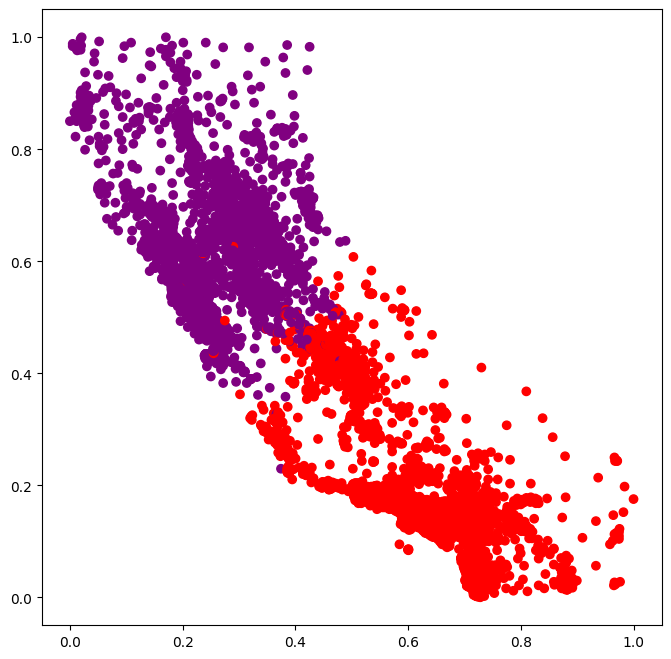

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


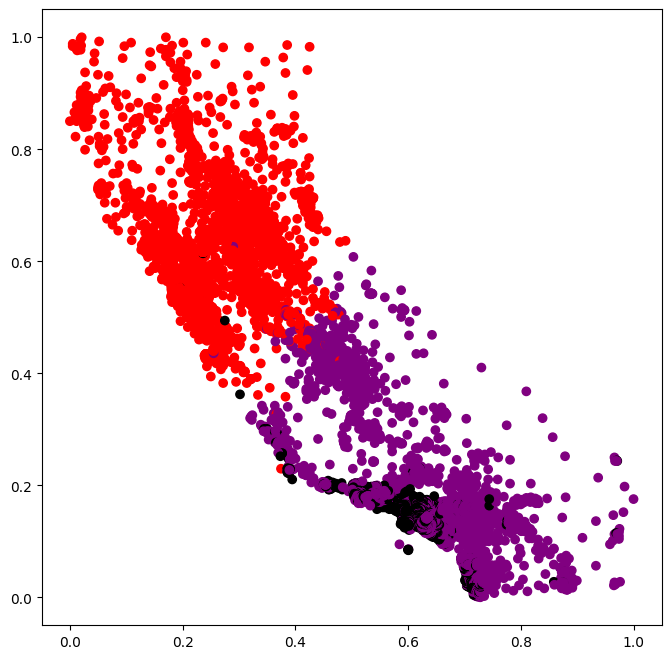

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


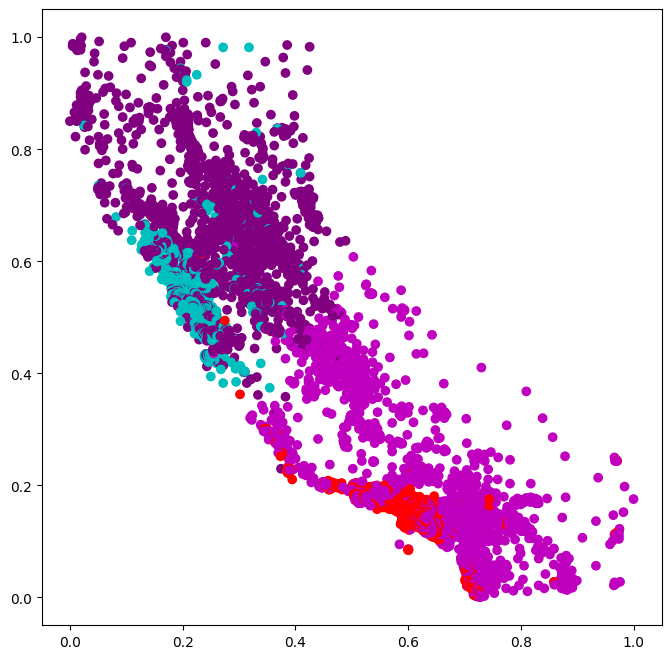

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


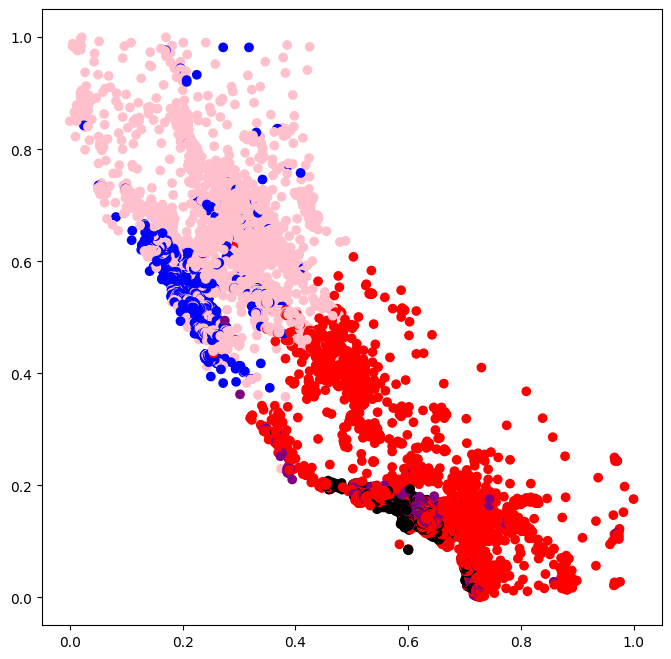

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


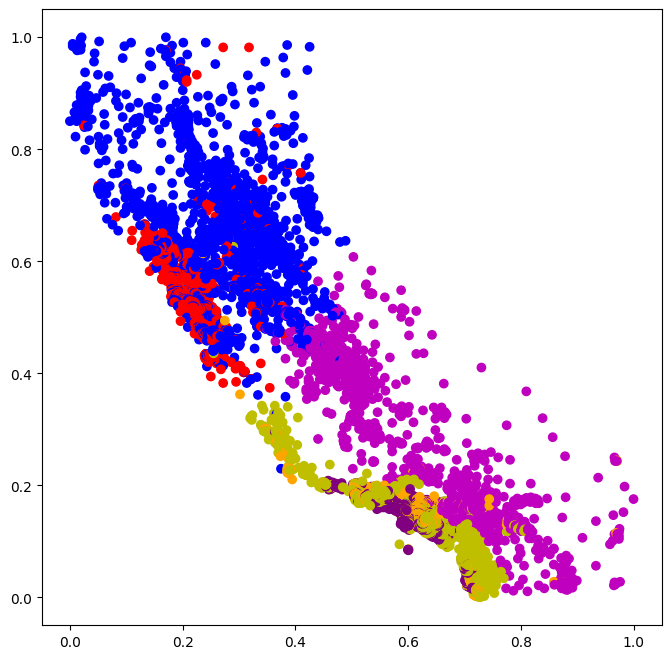

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


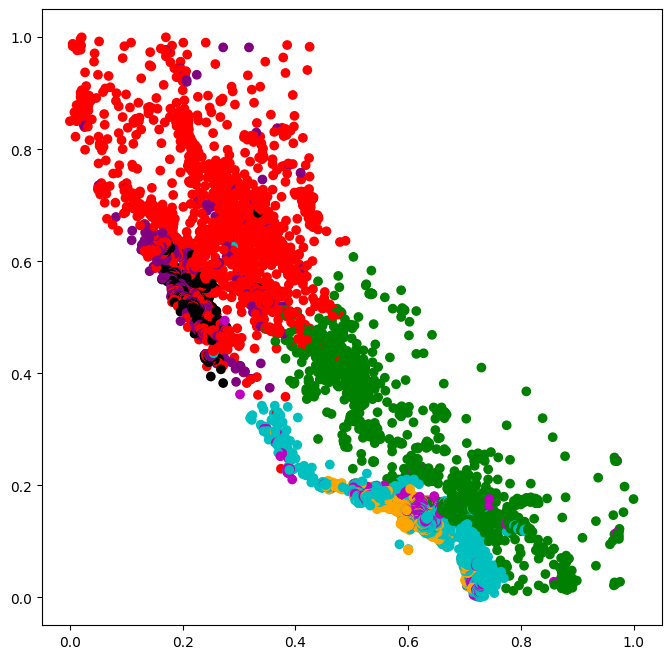

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


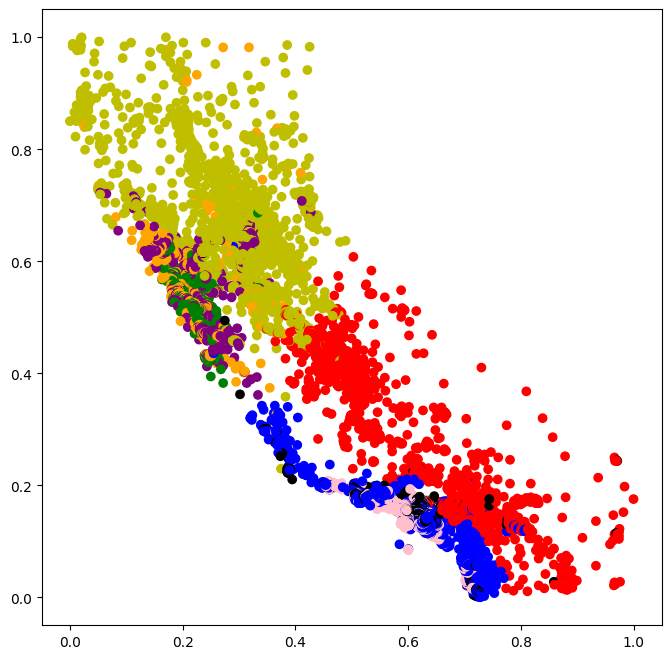

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


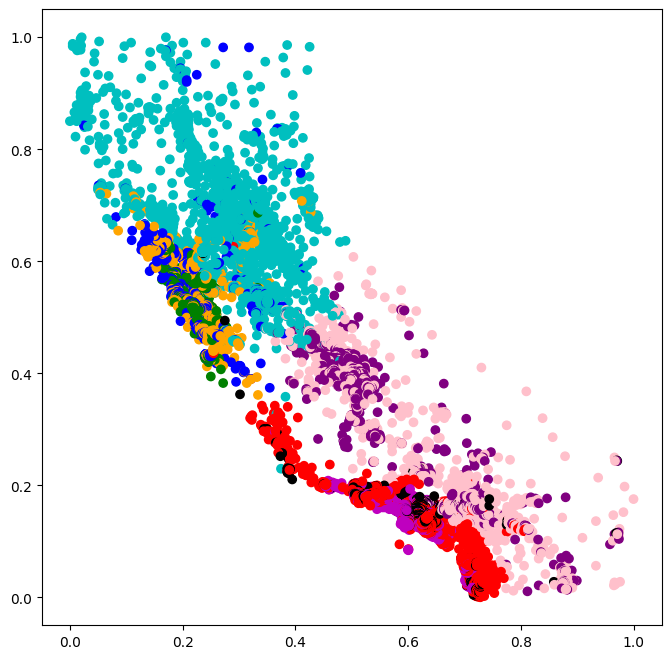

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


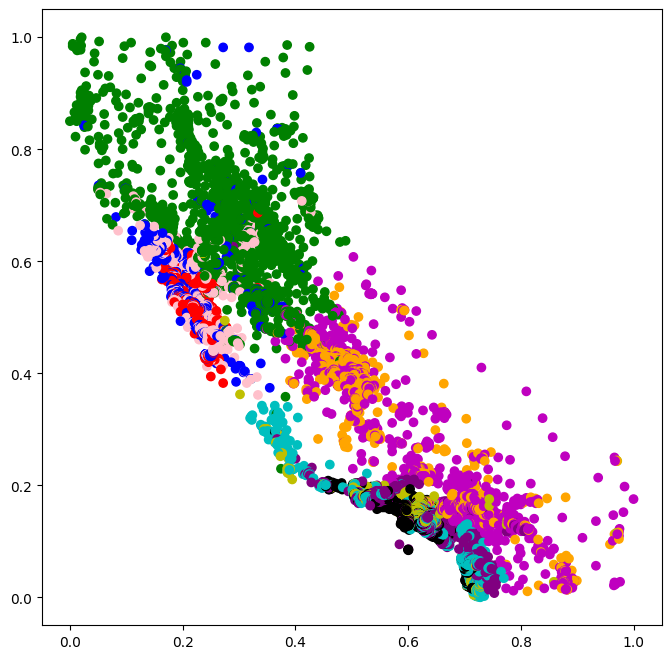

In [28]:
K_MAX = 11
davies_boulding_ag = np.zeros(K_MAX-2)
for k in range(2, K_MAX):
    ag = AgglomerativeClustering(n_clusters=k, linkage='ward', affinity='euclidean')
    ag.fit(df_dropped.values)
    plot_clusters(df_dropped.values, ag.labels_)

    davies_boulding_ag[k-2] = davies_bouldin_score(df_dropped.values, ag.labels_)

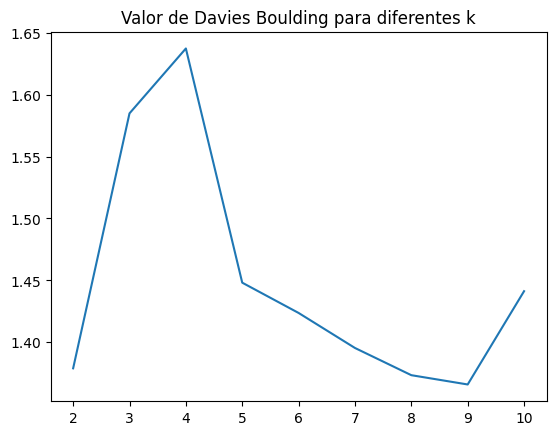

In [29]:
plt.plot(range(2, K_MAX), davies_boulding_ag)
_ = plt.title('Valor de Davies Boulding para diferentes k')

Hemos ejecutado Clustering jerárquico aglomerativo para clusters entre 2 y 10, y mostramos los clusters en funcion de su latitud y longitud. Además, mostramos una gráfica de los diferentes valores del índice de Davies Boulding. En ella podemos ver que con 9 clusters obtenemos el valor mínimo del índice, luego ese es el número de clusters óptimo.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


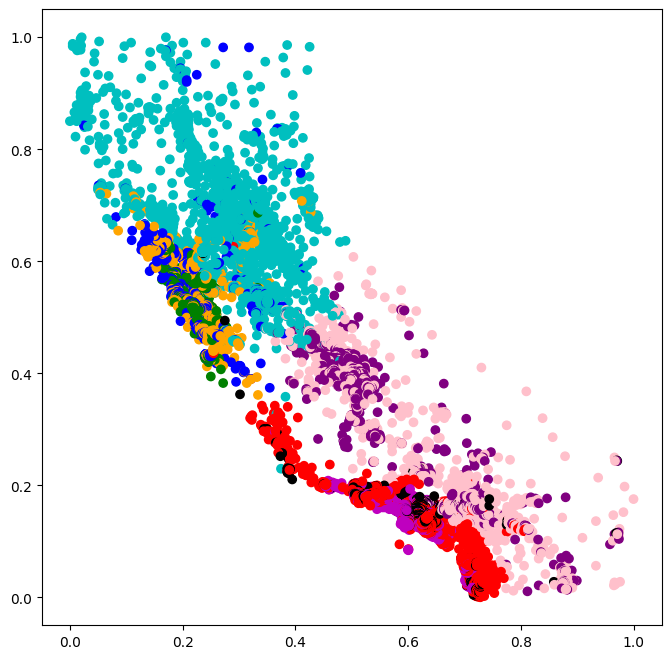

In [30]:
ag = AgglomerativeClustering(n_clusters=9, linkage='ward', affinity='euclidean')
ag.fit(df_dropped.values)
plot_clusters(df_dropped.values, ag.labels_)

In [38]:
filtered = df.drop(['ocean_proximity', 'total_bedrooms', 'households'], axis=1).copy()
df_clusters_ag = filtered.assign(cluster=pd.Series(data=ag.labels_))
df_clusters_ag

longitude  latitude  housing_median_age  total_rooms  population  \
0        -122.23     37.88                41.0        880.0       322.0   
1        -122.22     37.86                21.0       7099.0      2401.0   
2        -122.24     37.85                52.0       1467.0       496.0   
3        -122.25     37.85                52.0       1274.0       558.0   
4        -122.25     37.85                52.0       1627.0       565.0   
...          ...       ...                 ...          ...         ...   
20428    -121.09     39.48                25.0       1665.0       845.0   
20429    -121.21     39.49                18.0        697.0       356.0   
20430    -121.22     39.43                17.0       2254.0      1007.0   
20431    -121.32     39.43                18.0       1860.0       741.0   
20432    -121.24     39.37                16.0       2785.0      1387.0   

       median_income  median_house_value  cluster  
0             8.3252            452600.0        0  
1             8.3014            358500.0        0  
2             7.2574            352100.0        0  
3             5.6431            341300.0        0  
4             3.8462            342200.0        0  
...              ...                 ...      ...  
20428         1.5603             78100.0        0  
20429         2.5568             77100.0        0  
20430         1.7000             92300.0        0  
20431         1.8672             84700.0        0  
20432         2.3886             89400.0        0  

[20433 rows x 8 columns]

Ahora, hemos reescalado los datos y añadido una columna con el cluster correspondiente a cada entrada. Todo ello con el número de clusters óptimo (9).

In [40]:
df_clusters_ag.groupby(["cluster"]).describe().transpose()

cluster                               0              1              2
longitude          count    7966.000000   10916.000000    1551.000000
                   mean     -121.877996    -118.082710    -118.192714
                   std         0.708338       0.862444       0.497276
                   min      -124.350000    -121.920000    -120.670000
                   25%      -122.290000    -118.360000    -118.430000
                   50%      -122.000000    -118.120000    -118.320000
                   75%      -121.420000    -117.560000    -117.920000
                   max      -118.920000    -114.310000    -116.260000
latitude           count    7966.000000   10916.000000    1551.000000
                   mean       38.044105      34.124013      33.872689
                   std         0.965131       0.939906       0.374582
                   min        34.720000      32.540000      32.630000
                   25%        37.530000      33.790000      33.730000
                   50%        37.830000      34.010000      33.990000
                   75%        38.510000      34.180000      34.120000
                   max        41.950000      38.430000      35.300000
housing_median_age count    7966.000000   10916.000000    1551.000000
                   mean       29.203992      27.978930      30.304965
                   std        13.408805      11.908589      12.648671
                   min         1.000000       1.000000       2.000000
                   25%        18.000000      18.000000      21.000000
                   50%        28.000000      29.000000      31.000000
                   75%        39.000000      36.000000      39.000000
                   max        52.000000      52.000000      52.000000
total_rooms        count    7966.000000   10916.000000    1551.000000
                   mean     2567.671981    2633.205570    3013.245648
                   std      1924.439247    2367.094209    2072.353617
                   min         8.000000       2.000000      20.000000
                   25%      1437.000000    1426.750000    1752.000000
                   50%      2144.000000    2064.500000    2501.000000
                   75%      3144.750000    3069.000000    3620.000000
                   max     27870.000000   39320.000000   18132.000000
population         count    7966.000000   10916.000000    1551.000000
                   mean     1288.006779    1555.085379    1212.357834
                   std       979.863704    1253.722506     815.083402
                   min         8.000000       3.000000      15.000000
                   25%       706.000000     870.000000     704.500000
                   50%      1066.000000    1269.500000    1002.000000
                   75%      1588.000000    1853.500000    1474.500000
                   max     12153.000000   35682.000000    7431.000000
median_income      count    7966.000000   10916.000000    1551.000000
                   mean        3.887658       3.450988       6.743631
                   std         1.887557       1.356544       2.604405
                   min         0.499900       0.499900       0.499900
                   25%         2.583300       2.414950       5.083600
                   50%         3.549850       3.281550       6.397400
                   75%         4.750000       4.281300       8.053950
                   max        15.000100      12.538100      15.000100
median_house_value count    7966.000000   10916.000000    1551.000000
                   mean   205623.781321  174923.790583  438035.727917
                   std    116844.802661   75952.532064   64856.116168
                   min     14999.000000   14999.000000  286800.000000
                   25%    112500.000000  116375.000000  376750.000000
                   50%    176900.000000  166800.000000  453800.000000
                   75%    269775.000000  224600.000000  500001.000000
                   max    500001.000000  451100.000000  500001.000000

In [41]:
df_clusters_ag_cat = df.assign(cluster=pd.Series(data=ag.labels_))
df_clusters_ag_cat.groupby(["cluster"]).describe(include=["object"]).transpose()

cluster                      0          1          2
ocean_proximity count     7966      10916       1551
                unique       4          4          3
                top     INLAND  <1H OCEAN  <1H OCEAN
                freq      3243       6169       1200

Al igual que en el caso en el que hemos utilizado k-Means para agrupar en distintos clusters, obtenemos un número altísimo de clusters. Haciendo uso de la latitud y longitud de los distintos clusters y su proximidad al oceáno, podemos ditinguir 4 zonas:


*   Clusters situados en el norte cerca de la costa: Se corresponden con los clusters 1, 2 y 7 (Verde, azul oscuro y Naranja). Dentro de estos 3, hay una clara diferencia en la edad media de las casas. El cluster 7 agrupa casas mucho más nuevas (16 años de media) mientras que la media de los clusters 1 y 2 es de unos 34 y 39 años respectivamente. Por último, estos últimos dos clusters se diferencian mucho por los precios de las casas y los ingresos. El cluster 1 agrupa las casas más caras y con ingresos más altos(420000 USD de precio medio y 6k USD de media de ingresos) mientras que el cluster 2 agrupa casas con un precio medio de 197000 USD y unos ingresos medios de 3k USD.
*   Cluster situado en el norte en el interior: Se corresponde con el cluster 3 (Azul claro). En él, la edad media de las casas es de 22 años y el precio medio de las viviendas es de 119000 USD. Este precio es mucho más bajo que las casas del norte situadas cerca de la costa.

*   Clusters situados en el sur cerca de la costa: Se corresponden con los clusters 0, 4 y 5 (Rojo, morado claro y negro). Al igual que en loclusters situados en el norte cerca de la costa, hay una clara diferencia en la edad media de las casas. El cluster 0 agrupa casas mucho más nuevas (18 años de media) mientras que la media de los clusters 4 y 5 es de unos 38 y 36 años respectivamente. Por último, estos últimos dos clusters se diferencian mucho por los precios de las casas y los ingresos. El cluster 5 agrupa las casas más caras y con ingresos más altos(403000 USD de precio medio y 5k USD de media de ingresos) mientras que el cluster 4 agrupa casas con un precio medio de 173000 USD y unos ingresos medios de 3k USD.

*   Cluster situado en el sur en el interior: Se corresponde con el cluster 8 (Rosa claro). En él, la edad media de las casas es de 32 años y el precio medio de las viviendas es de 87000 USD. Este precio es mucho más bajo que las casas del sur situadas cerca de la costa y notablemente más bajo que todas las casas en general.

*    Cluster situado en el centro en el interior: Se corresponde con el cluster 6 (Morado). En él, la edad media de las casas es de 14 años y el precio medio de las viviendas es de 120000 USD. Sus características son muy similares a las del cluster 8 excepto por la edad media de las viviendas, lo que ha producido esta diferenciación entre estos dos clusters.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


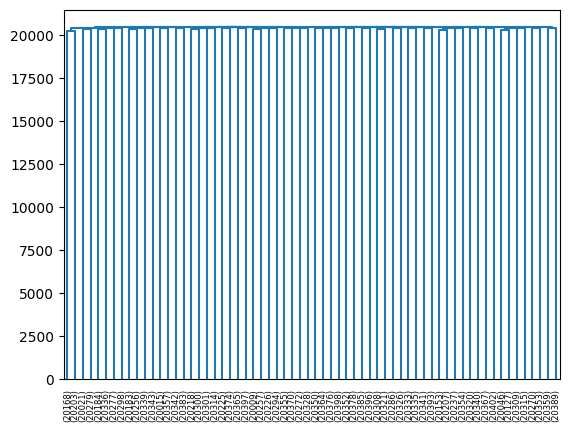

In [42]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



ag = AgglomerativeClustering(n_clusters=9, linkage='ward', affinity='euclidean')
ag.fit(df_dropped.values)

# Dibujar los primeros 5 niveles del árbol
levels = 5
plot_dendrogram(ag, p=levels, truncate_mode='level')

Finalmente dibujamos el dendograma. Hemos dibujado solo los 5 primeros niveles ya que el árbol completo tendría tantos niveles como puntos del espacio. El dendograma es demasiado complejo ya que hay muchas variables, por lo que no podemos detectar las ramas claramente. De nuevo intentaremos reducir la complejidad del análisis de los clusters eliminando la variable housing_median_age. Para ello utilizamos el data frame df_dropped_2 que ya tiene eliminada esa variable.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


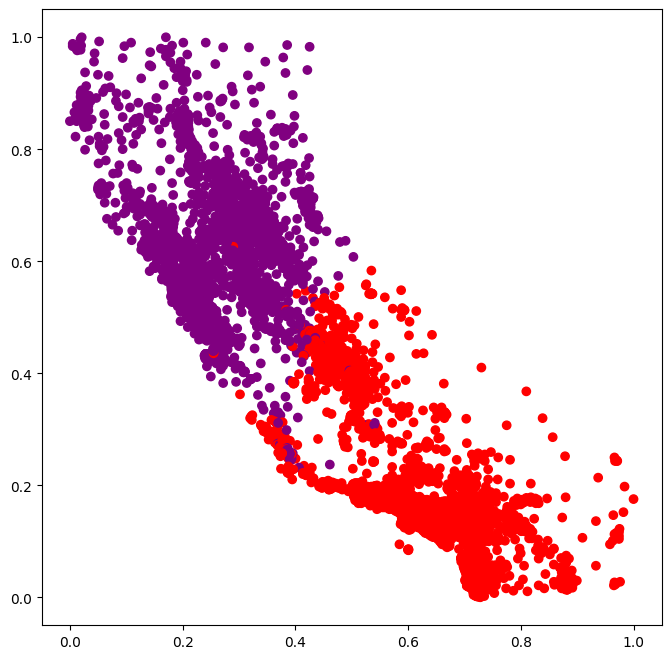

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


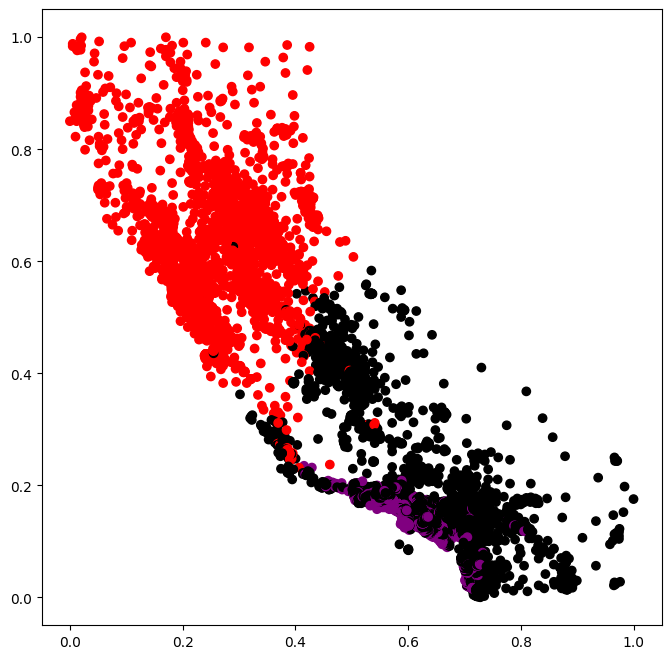

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


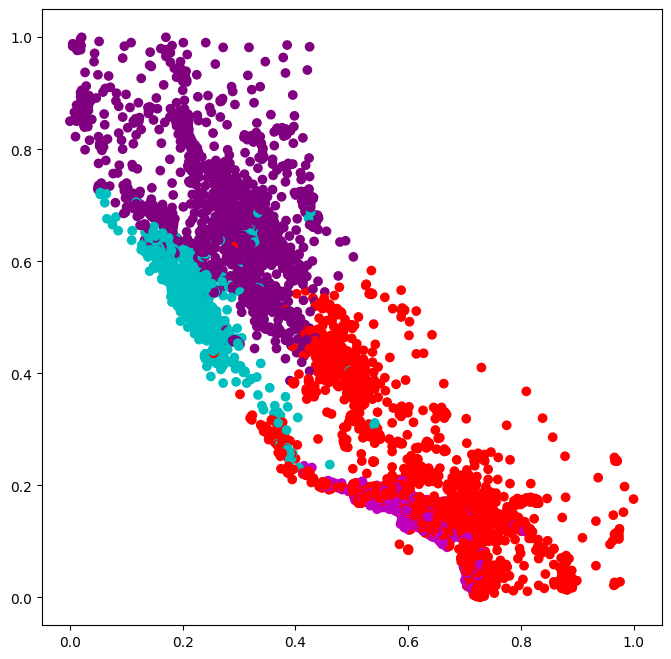

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


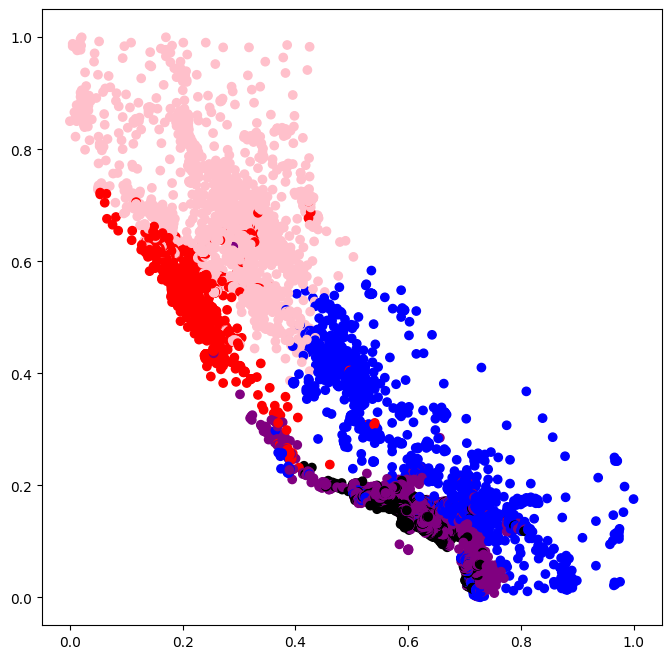

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


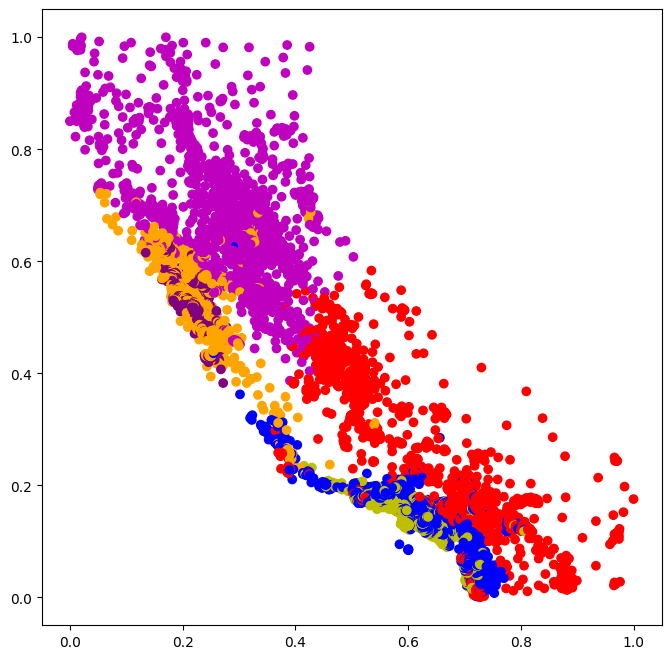

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


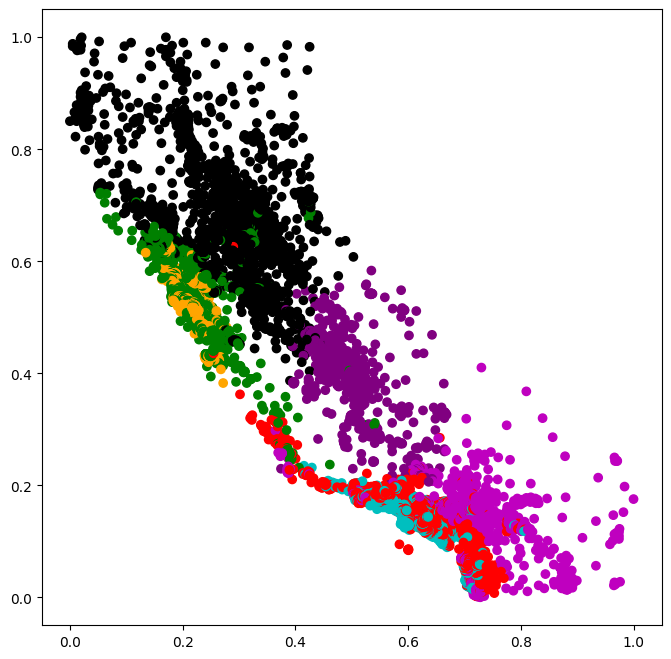

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


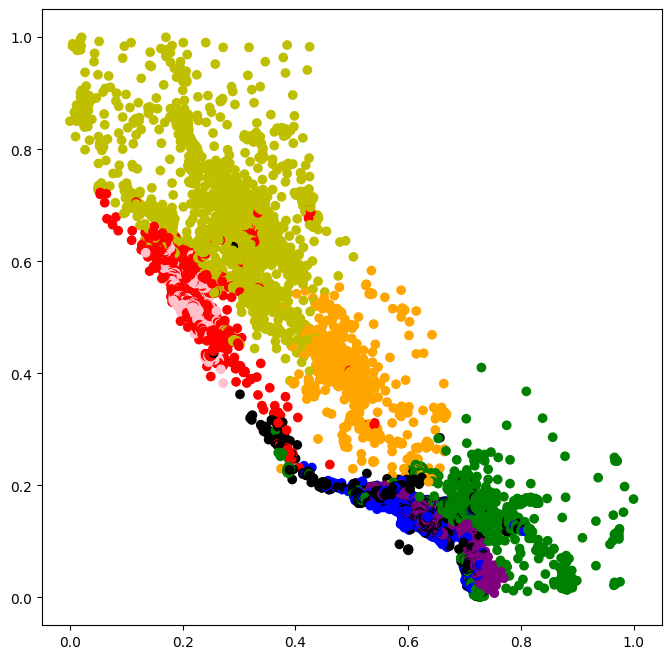

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


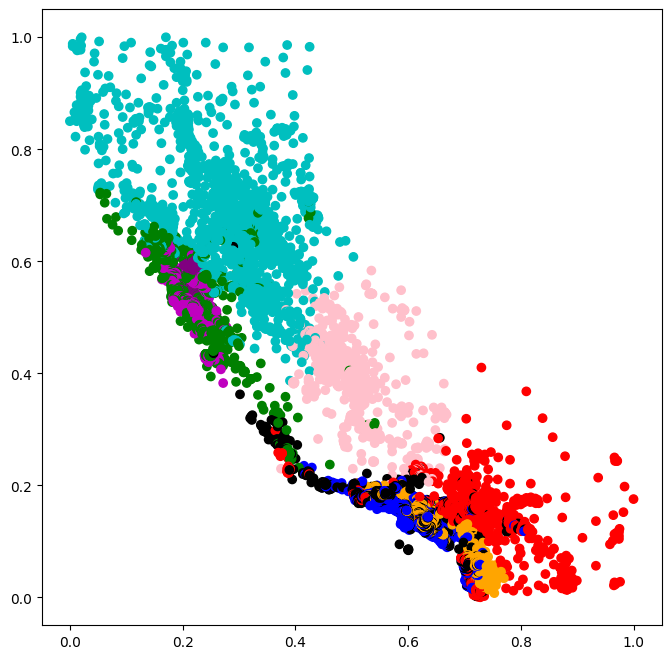

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


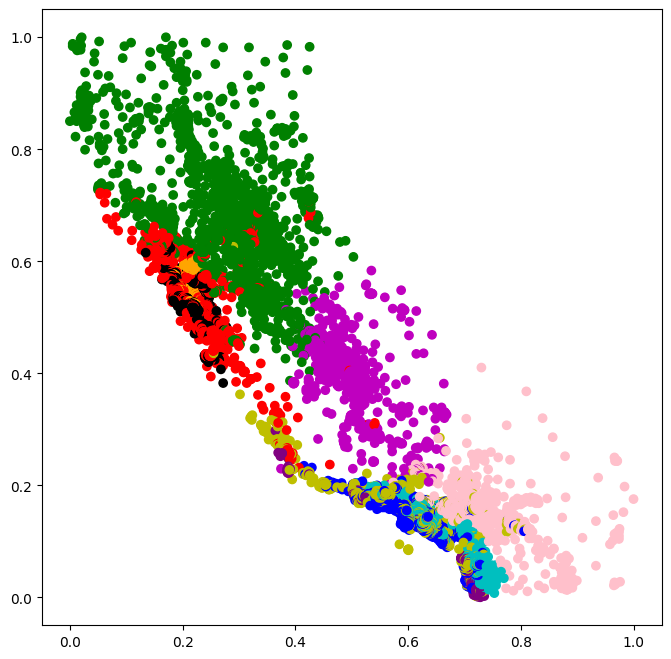

In [46]:
K_MAX = 11
davies_boulding_2 = np.zeros(K_MAX-2)
for k in range(2, K_MAX):
    ag = AgglomerativeClustering(n_clusters=k, linkage='ward', affinity='euclidean')
    ag.fit(df_dropped_2.values)
    plot_clusters(df_dropped_2.values, ag.labels_)

    davies_boulding_2[k-2] = davies_bouldin_score(df_dropped_2.values, ag.labels_)

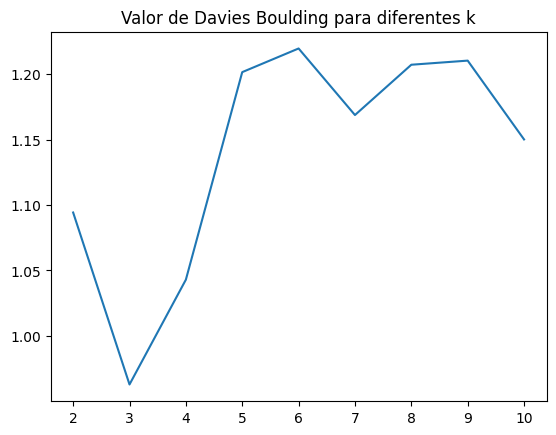

In [47]:
plt.plot(range(2, K_MAX), davies_boulding_2)
_ = plt.title('Valor de Davies Boulding para diferentes k')

Observamos que en este caso el número óptimo de clusters también se reduce drásticamente, siendo la mejor opción quedarse solo con 3 clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


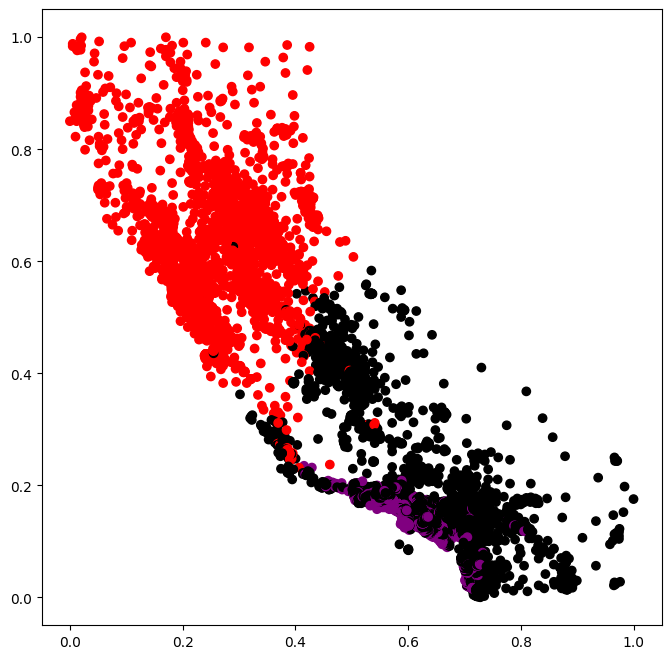

In [48]:
ag = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean')
ag.fit(df_dropped_2.values)
plot_clusters(df_dropped_2.values, ag.labels_)

In [49]:
filtered = df.drop(['ocean_proximity', 'total_bedrooms', 'households', 'housing_median_age'], axis=1).copy()
df_clusters_ag_2 = filtered.assign(cluster=pd.Series(data=ag.labels_))
df_clusters_ag_2

longitude  latitude  total_rooms  population  median_income  \
0        -122.23     37.88        880.0       322.0         8.3252   
1        -122.22     37.86       7099.0      2401.0         8.3014   
2        -122.24     37.85       1467.0       496.0         7.2574   
3        -122.25     37.85       1274.0       558.0         5.6431   
4        -122.25     37.85       1627.0       565.0         3.8462   
...          ...       ...          ...         ...            ...   
20428    -121.09     39.48       1665.0       845.0         1.5603   
20429    -121.21     39.49        697.0       356.0         2.5568   
20430    -121.22     39.43       2254.0      1007.0         1.7000   
20431    -121.32     39.43       1860.0       741.0         1.8672   
20432    -121.24     39.37       2785.0      1387.0         2.3886   

       median_house_value  cluster  
0                452600.0        0  
1                358500.0        0  
2                352100.0        0  
3                341300.0        0  
4                342200.0        0  
...                   ...      ...  
20428             78100.0        0  
20429             77100.0        0  
20430             92300.0        0  
20431             84700.0        0  
20432             89400.0        0  

[20433 rows x 7 columns]

In [50]:
df_clusters_ag_2.groupby(["cluster"]).describe().transpose()

cluster                               0              1              2
longitude          count    7966.000000   10916.000000    1551.000000
                   mean     -121.877996    -118.082710    -118.192714
                   std         0.708338       0.862444       0.497276
                   min      -124.350000    -121.920000    -120.670000
                   25%      -122.290000    -118.360000    -118.430000
                   50%      -122.000000    -118.120000    -118.320000
                   75%      -121.420000    -117.560000    -117.920000
                   max      -118.920000    -114.310000    -116.260000
latitude           count    7966.000000   10916.000000    1551.000000
                   mean       38.044105      34.124013      33.872689
                   std         0.965131       0.939906       0.374582
                   min        34.720000      32.540000      32.630000
                   25%        37.530000      33.790000      33.730000
                   50%        37.830000      34.010000      33.990000
                   75%        38.510000      34.180000      34.120000
                   max        41.950000      38.430000      35.300000
total_rooms        count    7966.000000   10916.000000    1551.000000
                   mean     2567.671981    2633.205570    3013.245648
                   std      1924.439247    2367.094209    2072.353617
                   min         8.000000       2.000000      20.000000
                   25%      1437.000000    1426.750000    1752.000000
                   50%      2144.000000    2064.500000    2501.000000
                   75%      3144.750000    3069.000000    3620.000000
                   max     27870.000000   39320.000000   18132.000000
population         count    7966.000000   10916.000000    1551.000000
                   mean     1288.006779    1555.085379    1212.357834
                   std       979.863704    1253.722506     815.083402
                   min         8.000000       3.000000      15.000000
                   25%       706.000000     870.000000     704.500000
                   50%      1066.000000    1269.500000    1002.000000
                   75%      1588.000000    1853.500000    1474.500000
                   max     12153.000000   35682.000000    7431.000000
median_income      count    7966.000000   10916.000000    1551.000000
                   mean        3.887658       3.450988       6.743631
                   std         1.887557       1.356544       2.604405
                   min         0.499900       0.499900       0.499900
                   25%         2.583300       2.414950       5.083600
                   50%         3.549850       3.281550       6.397400
                   75%         4.750000       4.281300       8.053950
                   max        15.000100      12.538100      15.000100
median_house_value count    7966.000000   10916.000000    1551.000000
                   mean   205623.781321  174923.790583  438035.727917
                   std    116844.802661   75952.532064   64856.116168
                   min     14999.000000   14999.000000  286800.000000
                   25%    112500.000000  116375.000000  376750.000000
                   50%    176900.000000  166800.000000  453800.000000
                   75%    269775.000000  224600.000000  500001.000000
                   max    500001.000000  451100.000000  500001.000000

La división de los clusters realizada por este algoritmo es similar a la de k-means. En primer lugar, tenemos el cluster 0 (rojo), que agrupa prácticamente todas las propiedades del norte. El sur, sin embargo, se divide en dos clusters, el 2 (morado), que agrupa las viviendas más caras (438000 USD de media), junto con salarios de media superior a 6700 USD, y el 1 (negro), que engloba todas las propiedades no tan lujosas del sur de California.

Nos parece intereesante destacar que este algoritmo realiza su partición óptima diviendo el sur entre las propiedades más caras y las no tan caras, mientras que en el norte las agrupa todas juntas. Esto puede significar que los precios de las casas en el norte están más distribuidos que en el sur, donde hay un pequeño grupo de casas en la costa muy caras pero el resto tienen mucho menor precio.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


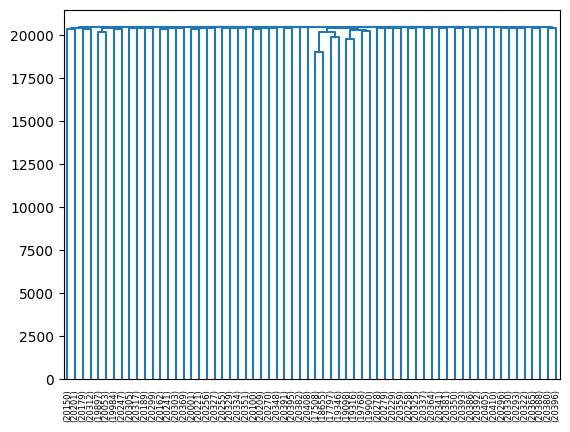

In [54]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



ag = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean')
ag.fit(df_dropped_2.values)

# Dibujar los primeros 5 niveles del árbol
levels = 5
plot_dendrogram(ag, p=levels, truncate_mode='level')